# Краткий гайд по построению графиков в питоне

**Дисклемер: в самом конце собрано несколько полезных советов, обязательно посмотрите их.**

В данном ноутбуке разбираются примеры графиков, с которыми вам предстоит работать по ходу курса МО-1. Материал довольно объемный, но совсем не сложный, и поможет сэкономить время при выполнение домашек. Вы можете просто просмотреть получающиеся картинки, останавливаясь подробно только на тех, что покажутся вам нетривиальными.

Визуализация данных зачастую позволяет наглядно увидеть их структуру, выделить важные для дальнейшей обработки свойства: наличие выбросов среди объектов, сбалансированность выборки, распределения признаков, зависимости между ними и т.д. Поэтому в дальнейшем умение строить аккуратные и информативные графики может сделать анализ данных более удобным и эффективным. 

В python для подобных целей есть библиотека matplotlib, чаще всего используют её модуль matplotlob.pyplot (сокращают как plt). Также часто используется библиотека seaborn (сокращается как sns), которая позволяет легко сделать графики более красивыми. Здесь мы разберём самые полезные и часто используемые виды графиков, соответствующие библиотечные функции и их параметры. 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

%matplotlib inline

np.random.seed(191)

## Общее оформление

Для начала на примере линейного графика рассмотрим общие правила оформления, позволяющие сохранить информативность и наглядность визуализации. В этом разделе познакомимся с функциями, отвечаюми за следующие свойства хорошего графика:
- Подходящий масштаб
- Заголовок графика
- Подписи осей
- Легенда графика

А также с более тонкой настройкой, такой как размер шрифта или поворот подписей. 

In [2]:
x = np.arange(7)
y = np.array([3, 1, 2, 4, 5, 3, 4])

Сначала просто изобразим эти данные на линейном графике — это делается с помощью функции `plt.plot()`, где первым аргументом подаётся массив `x`, а вторым — `y`.

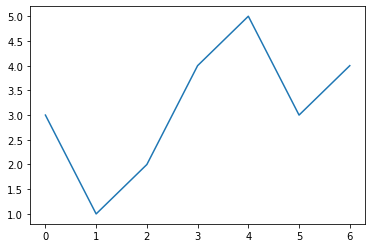

In [3]:
plt.plot(x, y)
plt.show()

Здесь используются параметры matplotlib по умолчанию — размер изображения, частота подписей на оси у, цвет самого графика. Постепенно мы научимся устанавливать нужные нам значения для каждого из этих параметров. 



### Размер изображения

Начнём с размера, он устанавливается функцией `plt.figure()`, а точнее значением аргумента `figsize`, который мы в неё подаём. Этот аргумент является парой двух чисел — ширина и высота графика. По умолчанию они равны 6 и 4 соответственно, но можно изменять на любое число типа float.

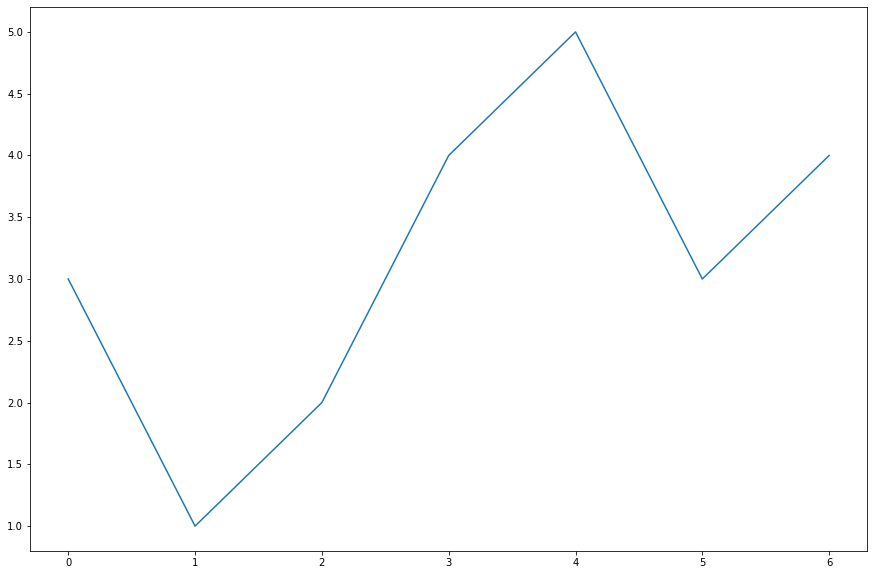

In [4]:
plt.figure(figsize = (15, 10))
plt.plot(x, y)
plt.show()

### Подписи осей и заголовок

Теперь добавим подписи. Заголовок графика добавляется функцией `plt.title()` с аргументом-строкой, подписи к осям х и у добавляются функциями `plt.xlabel()` и `plt.ylabel()` соответственно.

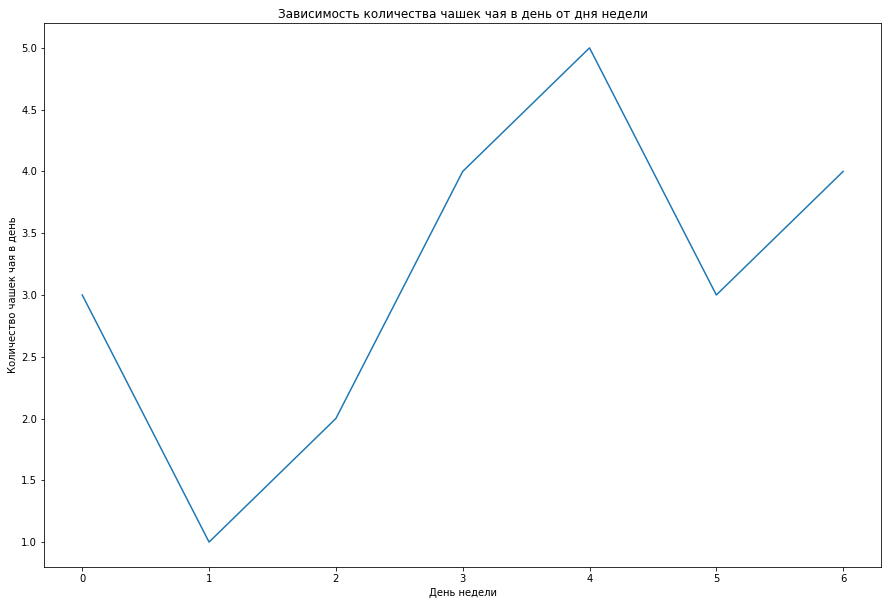

In [5]:
plt.figure(figsize = (15, 10))
plt.plot(x, y)
plt.title('Зависимость количества чашек чая в день от дня недели')
plt.xlabel('День недели')
plt.ylabel('Количество чашек чая в день')
plt.show()

Надписи добавили, но видно их плохо. Это можно исправить значением аргумента `fontsize`, отвечающего за размер шрифта во всех трёх функциях.

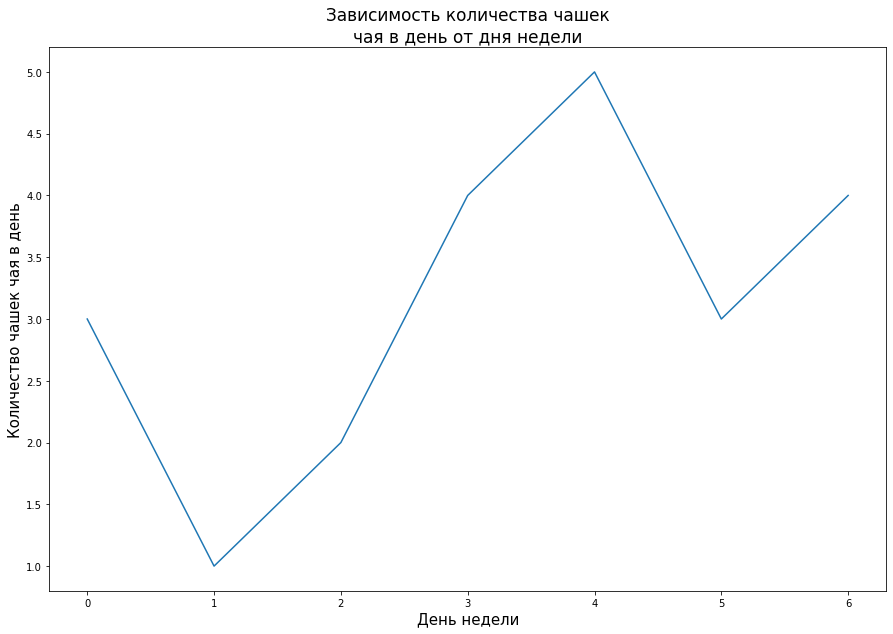

In [6]:
plt.figure(figsize = (15, 10))
plt.plot(x, y)
plt.title('Зависимость количества чашек\nчая в день от дня недели', fontsize=17)

plt.xlabel('День недели', fontsize=15)
plt.ylabel('Количество чашек чая в день', fontsize=15)

plt.show()

### Органичение осей

Если все данные помещаются на графике только в мелком масштабе, можно явным образом указать границы по осям. За это отвечают функции `plt.xlim()` и `plt.ylim()`, в качестве аргументов подаётся пара чисел, соответствующих границам.

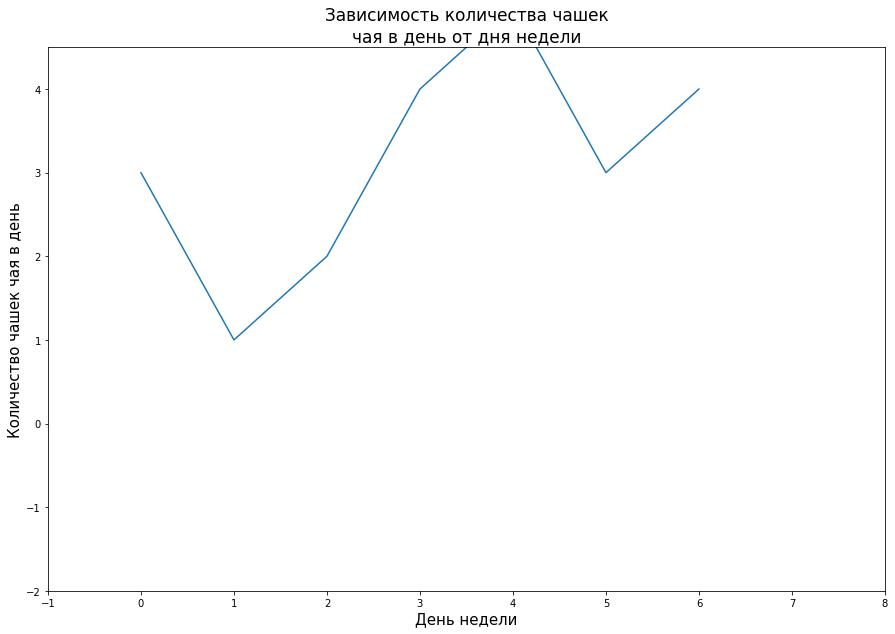

In [7]:
plt.figure(figsize = (15, 10))
plt.plot(x, y)
plt.title('Зависимость количества чашек\nчая в день от дня недели', fontsize=17)

plt.xlabel('День недели', fontsize=15)
plt.ylabel('Количество чашек чая в день', fontsize=15)

plt.xlim(-1, 8)
plt.ylim(-2, 4.5)

plt.show()

Как видим, в этом случае все данные, не попавшие в указанную область, просто не отображаются.

### Деления осей

Обратим внимание на оси и то, как часто расположены и как подписаны деления на них. Было бы удобней подписать дни недели их названиями, а не номерами, например. Также по оси у у нас только целые значения, поэтому можем убрать дробные значения из подписей. 

За подписи делений на осях отвечают функции `plt.xticks()` и `plt.yticks()` для соответствующих осей. Разберём нескоторые полезные аргументы этих функций.

Аргумент `ticks` задаёт массив делений, которые должны быть отмечены. Если они все меньше максимального значения в данных по соответствующей оси, дальше деления не будут добавляться, но график обрезан не будет. Если наоборот какое-то из значений больше максимума в данных, область по даннной оси будет увеличена. Аналогично с минимальными значениями. Кроме того, можно передать пустой массив, и тогда деления на оси будут отсутствовать.

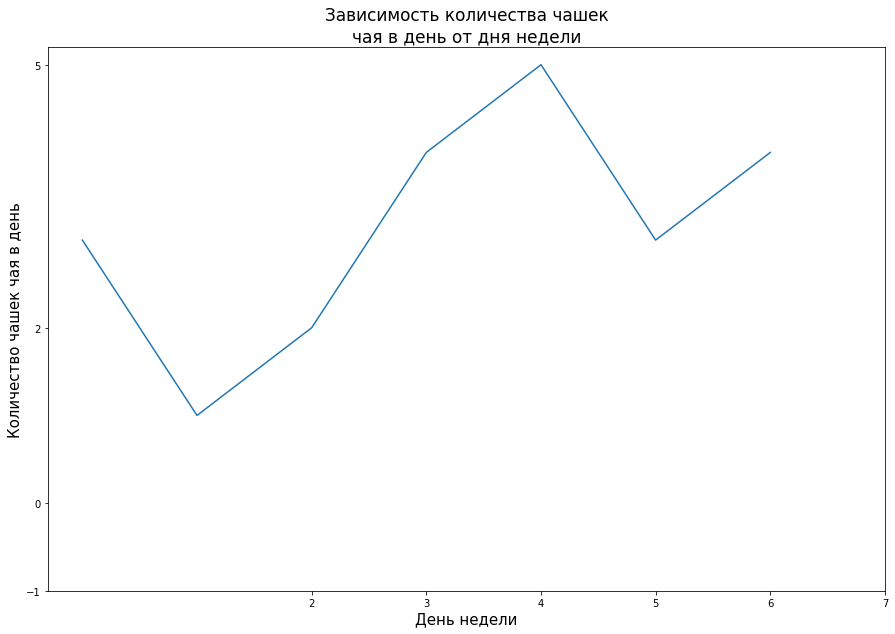

In [8]:
plt.figure(figsize = (15, 10))
plt.plot(x, y)
plt.title('Зависимость количества чашек\nчая в день от дня недели', fontsize=17)

plt.xlabel('День недели', fontsize=15)
plt.ylabel('Количество чашек чая в день', fontsize=15)

plt.xticks(ticks=np.arange(2, 8))
plt.yticks([-1, 0, 2, 5])

plt.show()

Так, как показано на примере выше, подписывать оси не стоит, но это наглядно демонстрирует возможности аргумента `ticks`. По умолчанию это первый агрумент функции, поэтому его можно не подписывать. 

Следующим по плану идёт аргумент `labels`. Это тоже массив, по длине совпадающий с массивом `ticks`. Он задаёт надписи, которыми нужно подписать деления. По умолчанию они совпадают со значениями из данных, поэтому их можно не указывать без необходимости. В нашем случае мы добавим названия дней недели по оси х. 

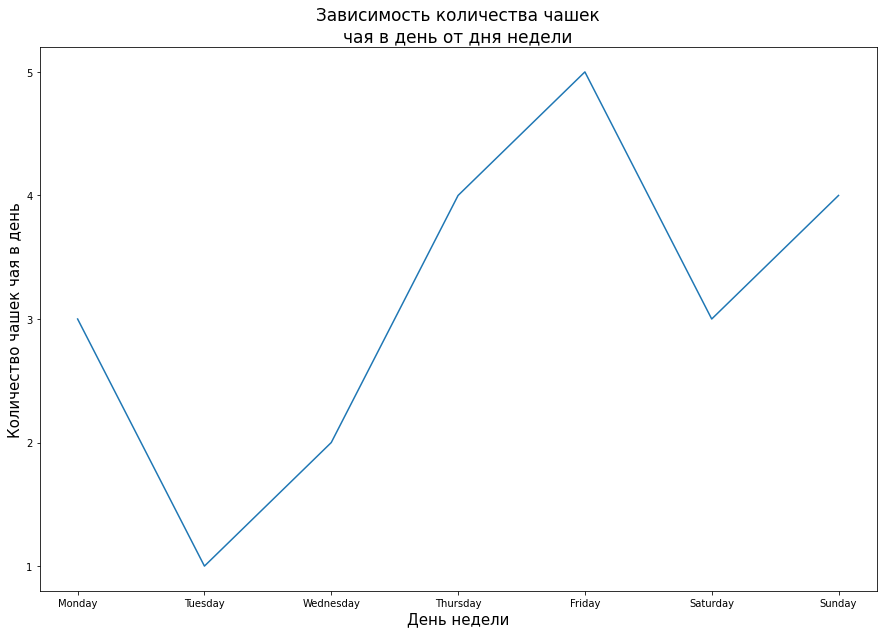

In [9]:
plt.figure(figsize = (15, 10))
plt.plot(x, y)
plt.title('Зависимость количества чашек\nчая в день от дня недели', fontsize=17)

plt.xlabel('День недели', fontsize=15)
plt.ylabel('Количество чашек чая в день', fontsize=15)

plt.xticks(np.arange(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.yticks(np.arange(1, 6))

plt.show()

Аргумент, отвечающий за размер шрифта, здесь такой же — `fontsize`. Кроме него может пригодиться поворот подписей на какой-то градус. Он задаётся числовым аргументом `rotation`, измеряется в градусах.

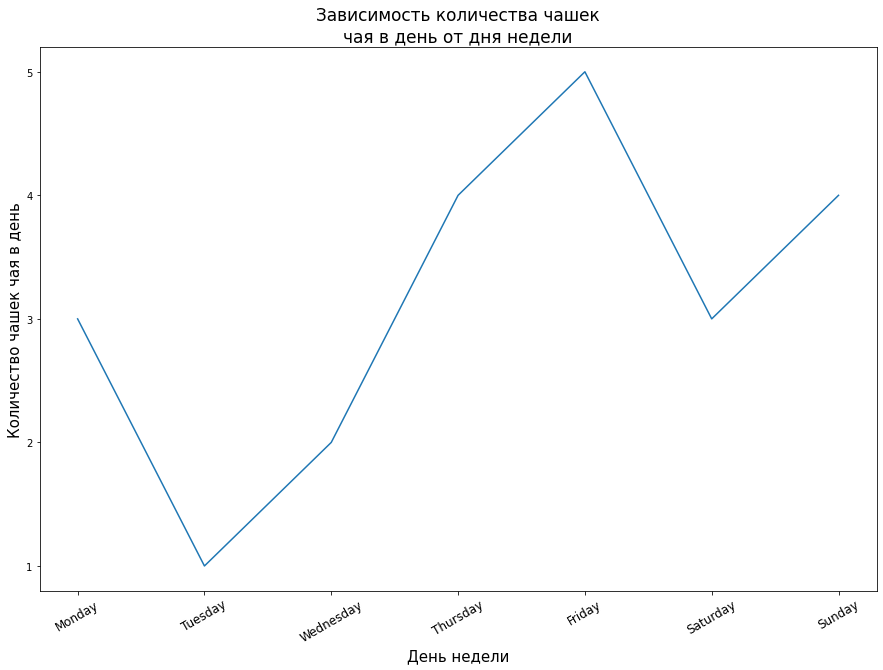

In [10]:
plt.figure(figsize = (15, 10))
plt.plot(x, y)
plt.title('Зависимость количества чашек\nчая в день от дня недели', fontsize=17)

plt.xlabel('День недели', fontsize=15)
plt.ylabel('Количество чашек чая в день', fontsize=15)

plt.xticks(np.arange(7),
           labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
           fontsize=12,
           rotation=30)
plt.yticks(np.arange(1, 6))

plt.show()

### Сетка

Чтобы было удобней ориентироваться в графике, бывает полезно использовать сетку. Здесь она добавляется функцией `plt.grid()`, по умолчанию для обеих осей, но можно указать только одну из них аргументом `axis`. Он принимает одно из трёх значений: `'x'`, `'y'`, `'both'` (по умолчанию). 

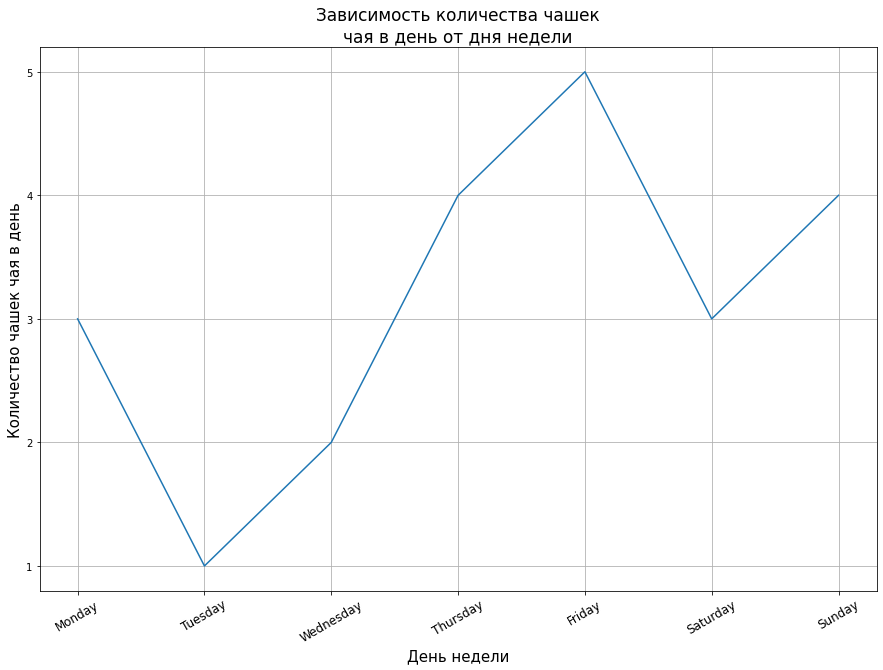

In [11]:
plt.figure(figsize = (15, 10))
plt.plot(x, y)
plt.title('Зависимость количества чашек\nчая в день от дня недели', fontsize=17)

plt.xlabel('День недели', fontsize=15)
plt.ylabel('Количество чашек чая в день', fontsize=15)

plt.xticks(np.arange(7),
           labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
           fontsize=12,
           rotation=30)
plt.yticks(np.arange(1, 6))

plt.grid()
plt.show()

### Легенда

В случае, когда на одном изображении находится несколько графиков, нужно заносить их в легенду. Она печатается функцией `plt.legend()`, заголовок задаётся агрументом `title`, подписи к разным графикам можно задавать как массивом `labels`, так и при добавлении самого графика аргументом `label`. 

In [12]:
y1 = y
y2 = np.array([5, 4, 5, 3, 4, 2, 5])

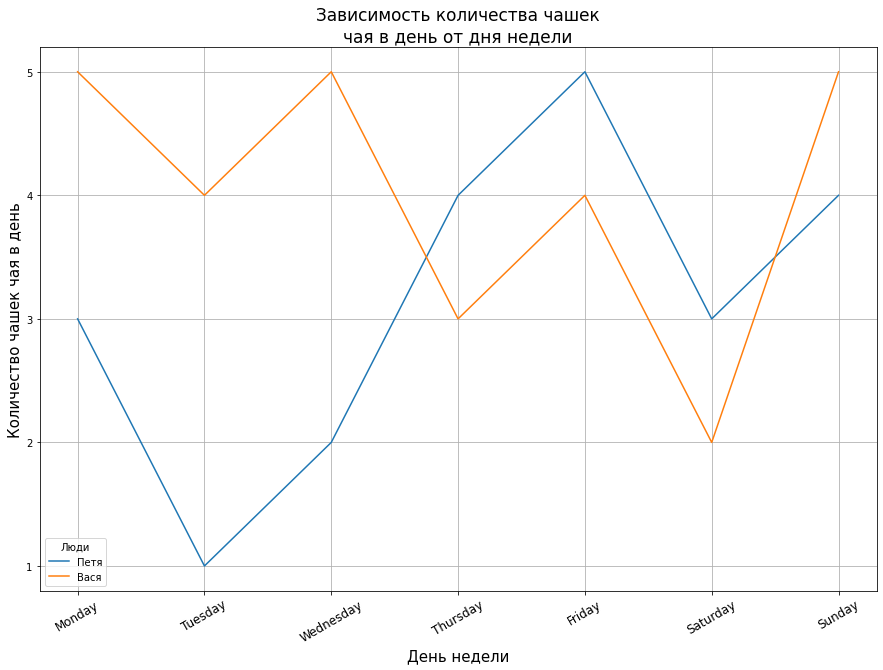

In [13]:
plt.figure(figsize = (15, 10))
plt.plot(x, y1)
plt.plot(x, y2) # добавили ещё один график

plt.title('Зависимость количества чашек\nчая в день от дня недели', fontsize=17)

plt.xlabel('День недели', fontsize=15)
plt.ylabel('Количество чашек чая в день', fontsize=15)

plt.xticks(np.arange(7),
           labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
           fontsize=12,
           rotation=30)
plt.yticks(np.arange(1, 6))

plt.legend(title='Люди', labels=['Петя', 'Вася'])

plt.grid()
plt.show()

Также можно настраивать следующие аргументы функции:
- `fontsize` отвечает за размер шрифта
- `title_fontsize` отвечает за размер шрифта заголовка легенды
- `ncol` является числом и соответствует количеству столбцов
- `loc` указывает расположение легенды, по умолчанию установлен в значение `'best'`, но может принимать и другие значения: `'upper right'`, `'upper left'`, `'lower left'`, `'lower right'`, `'right'`, `'center left'`, `'center right'`, `'lower center'`, `'upper center'`, `'center'`
- `shadow` делает легенду непрозрачной и добавляет к ней тень по краю

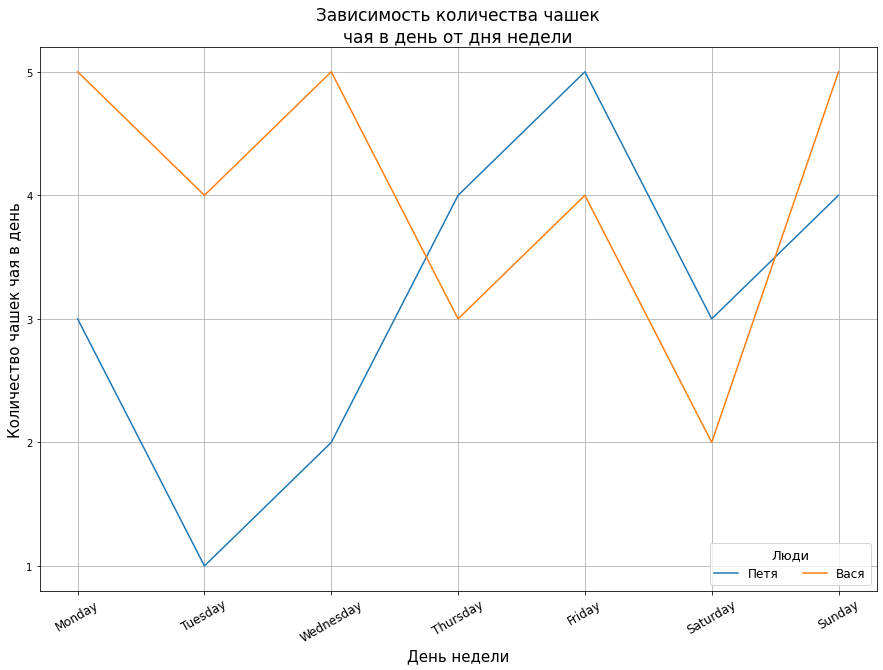

In [14]:
plt.figure(figsize = (15, 10))
plt.plot(x, y1, label='Петя') # перенесли объявление подписи в легенде
plt.plot(x, y2, label='Вася') # добавили ещё один график и сразу подпись к нему

plt.title('Зависимость количества чашек\nчая в день от дня недели', fontsize=17)

plt.xlabel('День недели', fontsize=15)
plt.ylabel('Количество чашек чая в день', fontsize=15)

plt.xticks(np.arange(7),
           labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
           fontsize=12,
           rotation=30)
plt.yticks(np.arange(1, 6))

plt.legend(title='Люди', title_fontsize=13, fontsize=12, ncol=2, loc='lower right')

plt.grid()
plt.show()

### Работа с цветом

Как видно выше, matplotlib может сам подобрать цвета для разных графиков на одном и том же изображении. Но часто бывает нужно для наглядности указывать конкретный цвет самостоятельно. Чаще всего за это отвечает параметр `color` или `c`. Обычно `color` явлется строкой, например, `'red'` или `'green'`. В качестве аргумента `c` зачастую передаётся массив, где каждой точке из массива данных соответствует свой цвет, который в том числе может являться и числом. Обычно такой массив создаётся с помощью логического выражения.

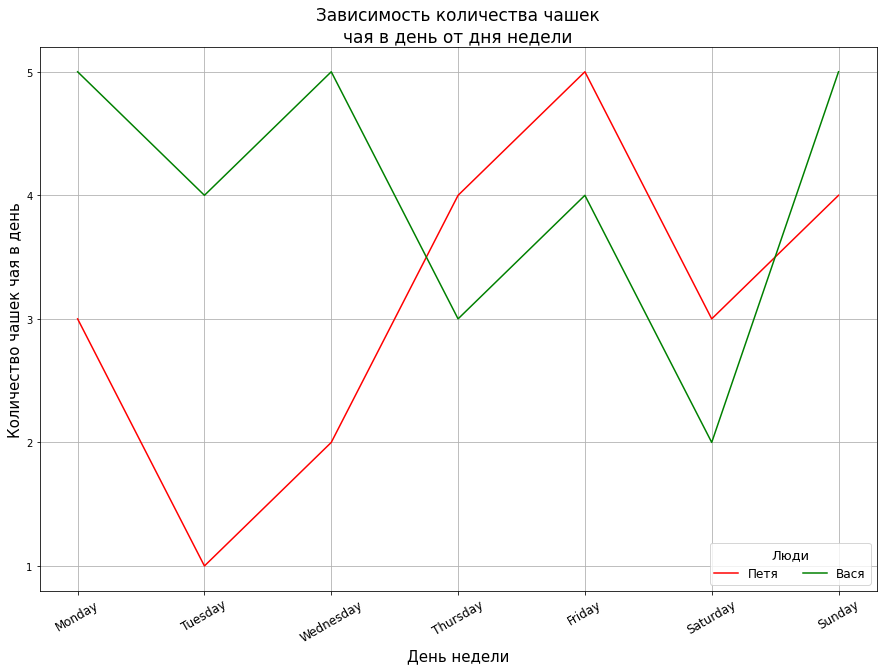

In [15]:
plt.figure(figsize = (15, 10))
plt.plot(x, y1, label='Петя', color='red')   # изменили цвет
plt.plot(x, y2, label='Вася', color='green') # изменили цвет

plt.title('Зависимость количества чашек\nчая в день от дня недели', fontsize=17)

plt.xlabel('День недели', fontsize=15)
plt.ylabel('Количество чашек чая в день', fontsize=15)

plt.xticks(np.arange(7),
           labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
           fontsize=12,
           rotation=30)
plt.yticks(np.arange(1, 6))

plt.legend(title='Люди', title_fontsize=13, fontsize=12, ncol=2, loc='lower right')

plt.grid()
plt.show()

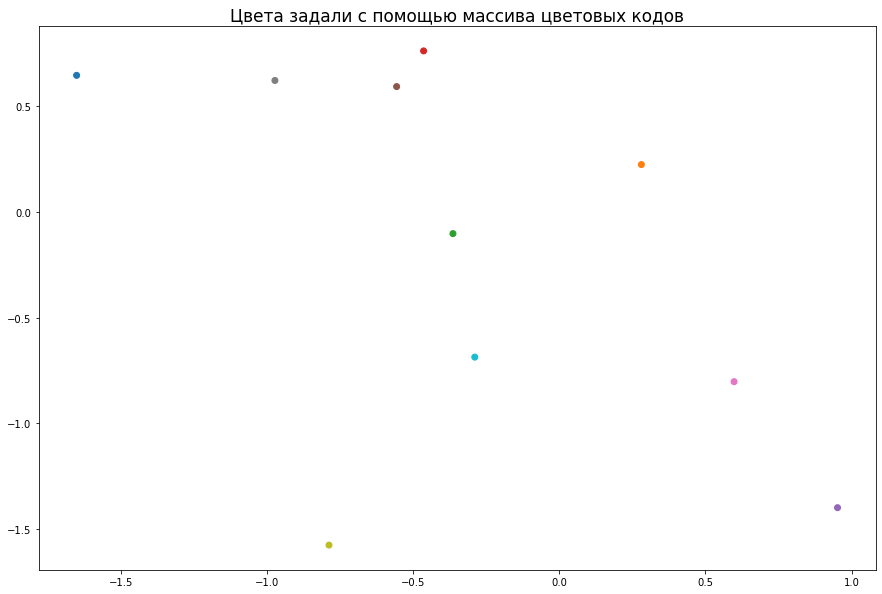

In [16]:
plt.figure(figsize = (15, 10))
x = np.random.normal(size=10)
y = np.random.normal(size=10)
plt.scatter(x, y, 
            c=[
                '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
            ])

plt.title('Цвета задали с помощью массива цветовых кодов', fontsize=17)

plt.show()

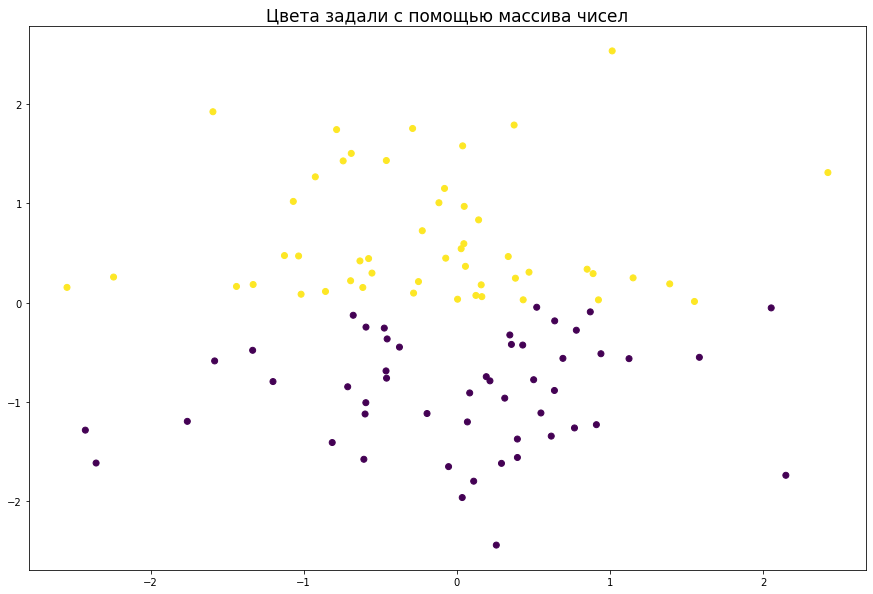

In [17]:
plt.figure(figsize = (15, 10))
x = np.random.normal(size=100)
y = np.random.normal(size=100)
plt.scatter(x, y, c=y>0)

plt.title('Цвета задали с помощью массива чисел', fontsize=17)

plt.show()

Больше разных цветов можно найти на сайте библиотеки по [ссылке](https://matplotlib.org/stable/tutorials/colors/colors.html).

## Простейшие виды графиков

В этом разделе мы рассмотрим подробней построение линейного графика и графика множества точек — двух наиболее часто встречающихся вариантов визуализации информации. Линейный график лучше использовать, если в данных присутствует последовательность, например, если данные распределены по времени. Множество точек полезно, если хочется увидеть распределение данных на плоскости и потом, например, посмотреть на наличие зависимости одного признака от другого, например.

### Линейный график

Как уже было показано выше, линейный график строится при помощи функции `plt.plot()`, где первым аргументом подаётся массив значений по оси х, а вторым — по оси у. Стоит ещё уточнить, что можно подавать только значения по оси у, тогда для оси х будет использоваться последовательность целых чисел, начиная с 0.

In [18]:
x = np.linspace(-5, 5, 100)
y = np.sin(x)

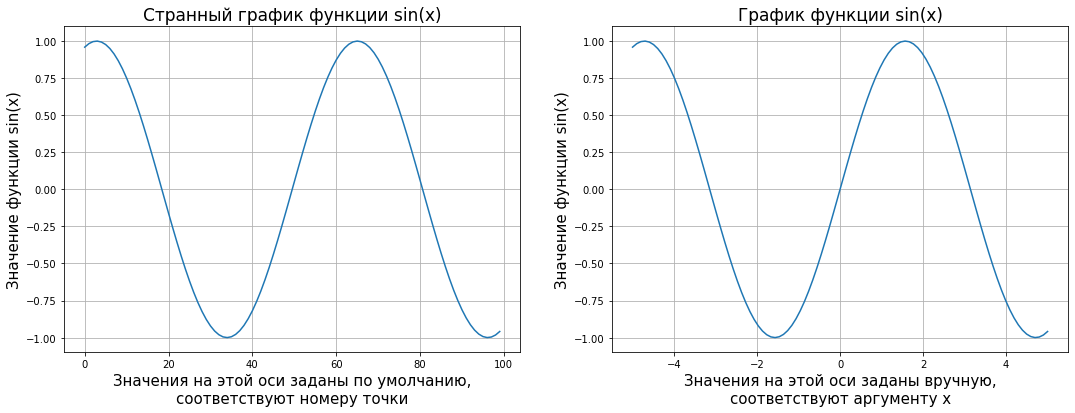

In [19]:
plt.figure(figsize = (18, 6))

plt.subplot(1, 2, 1)
plt.plot(y)
plt.title('Странный график функции sin(x)', fontsize=17)
plt.xlabel('Значения на этой оси заданы по умолчанию,\nсоответствуют номеру точки', fontsize=15)
plt.ylabel('Значение функции sin(x)', fontsize=15)
plt.grid()


plt.subplot(1, 2, 2)
plt.plot(x, y)
plt.title('График функции sin(x)', fontsize=17)
plt.xlabel('Значения на этой оси заданы вручную,\nсоответствуют аргументу x', fontsize=15)
plt.ylabel('Значение функции sin(x)', fontsize=15)
plt.grid()

plt.show()

Выше для наглядности использовалась функция `plt.subplot()`, про неё будет рассказано позднее. 

Что касается настраиваемых параметров самого линейного графика, рассмотрим те, что касаются линии: это толщина и её тип. За первое отвечает числовой аргумент `linewidth` или `lw`, за второе — `linestyle` или `ls`, который может принимать много разных значений, например, `'-'` для сплошной линии, `'--'` для пунктирной, `'-.'` для линии вида точка-тире, `':'` для линии вида точка-точка.

Эти же аргументы и их значения можно использовать и для настройки сетки.

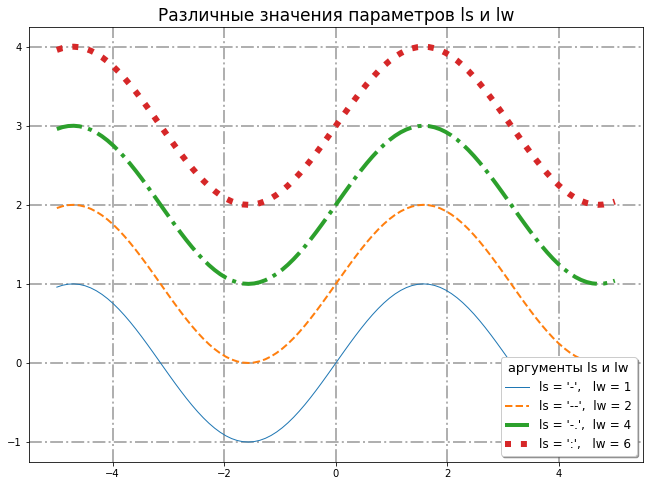

In [20]:
plt.figure(figsize = (11, 8))

plt.title('Различные значения параметров ls и lw', fontsize=17)

plt.plot(x, y,
         linestyle = '-',
         linewidth = 1,
         label="ls = '-',   lw = 1")

plt.plot(x, y + 1,
         linestyle = '--',
         linewidth = 2,
         label="ls = '--',  lw = 2")

plt.plot(x, y + 2,
         linestyle = '-.',
         linewidth = 4,
         label="ls = '-.',  lw = 4")

plt.plot(x, y + 3,
         linestyle = ':',
         linewidth = 6,
         label="ls = ':',   lw = 6")

plt.legend(title='аргументы ls и lw',
           fontsize=12,
           title_fontsize=13,
           loc='lower right',
           shadow=True)

plt.grid(linestyle='-.', linewidth=2)
plt.show()

Вернёмся к предыдущему примеру с чашками чая, там может быть удобно выделить точки специальными маркерами. Это может пригодиться для того, чтобы показать, где реальные данные, а где достроенные на их основе зависимости. За тип маркера отвечает аргумент `marker`, принимающий строковое или числовое значение. Самые часто используемые из них это:
- `'.'` для точки
- `'o'` для круга
- `'^'` для треугольника
- `'s'` для квадрата

Больше видов маркеров можно найти по [ссылке](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)

Параметр `markersize` отвечает за размер маркера и является числом.

In [21]:
x = np.arange(7)
y1 = np.array([3, 1, 2, 4, 5, 3, 4])
y2 = np.array([5, 4, 5, 3, 4, 2, 5])

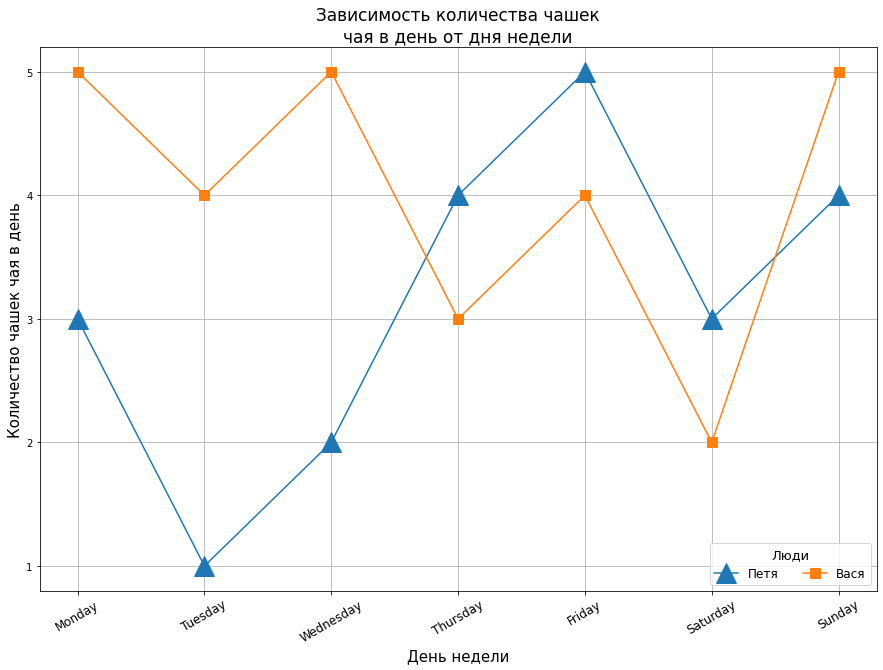

In [22]:
plt.figure(figsize = (15, 10))
plt.plot(x, y1, 
         label='Петя', 
         marker='^', 
         markersize=20)

plt.plot(x, y2, 
         label='Вася',
         marker='s', 
         markersize=10)

plt.title('Зависимость количества чашек\nчая в день от дня недели', fontsize=17)

plt.xlabel('День недели', fontsize=15)
plt.ylabel('Количество чашек чая в день', fontsize=15)

plt.xticks(np.arange(7),
           labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
           fontsize=12,
           rotation=30)
plt.yticks(np.arange(1, 6))

plt.legend(title='Люди', title_fontsize=13, fontsize=12, ncol=2, loc='lower right')

plt.grid()
plt.show()

Можно отдельно указывать и цвет линии, и цвет маркеров. За первое отвечает аргумент `color`, а за второе — `markerfacecolor`. Цвет границ маркера по умолчанию совпадает с цветом линии, но можно поменять и его с помощью параметра `markeredgecolor`.

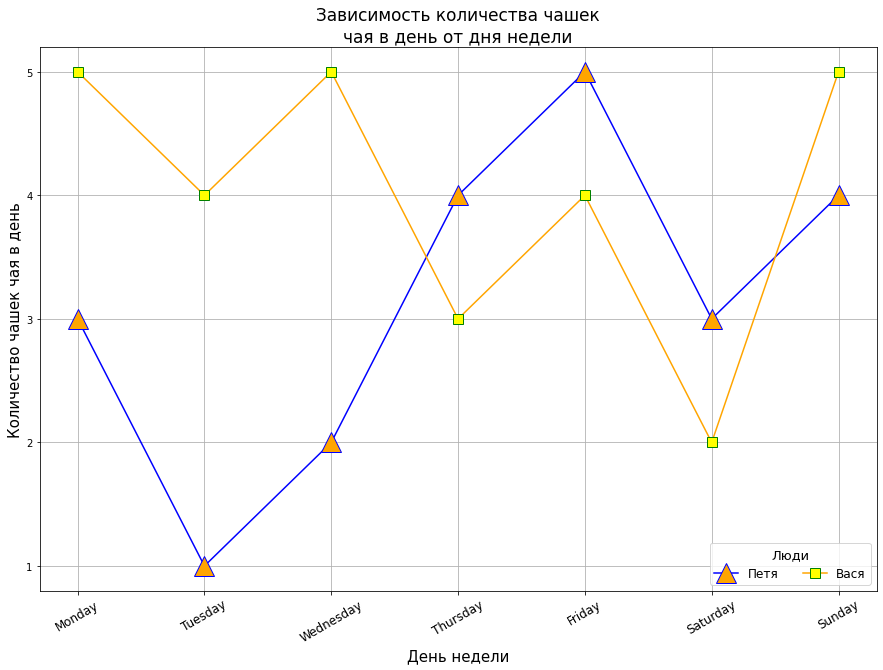

In [23]:
plt.figure(figsize = (15, 10))
plt.plot(x, y1, 
         label='Петя', 
         marker='^', 
         markersize=20,
         color='blue',
         markerfacecolor='orange')

plt.plot(x, y2, 
         label='Вася',
         marker='s', 
         markersize=10,
         color='orange',
         markerfacecolor='yellow',
         markeredgecolor='green')

plt.title('Зависимость количества чашек\nчая в день от дня недели', fontsize=17)

plt.xlabel('День недели', fontsize=15)
plt.ylabel('Количество чашек чая в день', fontsize=15)

plt.xticks(np.arange(7),
           labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
           fontsize=12,
           rotation=30)
plt.yticks(np.arange(1, 6))

plt.legend(title='Люди', title_fontsize=13, fontsize=12, ncol=2, loc='lower right')

plt.grid()
plt.show()

### Множество точек

График разброса точек показывает как распределены данные на какой-то плоскости. Его можно использовать, например, для предварительного анализа признак на предмет наличия зависимости. 

В библиотеке matplotlib за графики такого вида отвечает функция `plt.scatter()`, в качестве аргументов подаются массивы значений по оси х и по оси у.

In [24]:
x = np.random.normal(size=1000)
y = np.random.normal(size=1000)

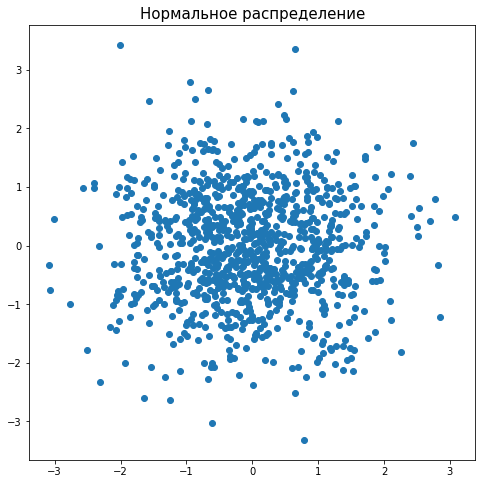

In [25]:
plt.figure(figsize = (8, 8))
plt.scatter(x, y)

plt.title('Нормальное распределение', fontsize=15)

plt.show()

Аналогично маркерам на линейном графике, у точек можно регулировать следующие параметры:
- `s` отвечает за размер, это либо одно число для всех точек, либо массив чисел с размером для каждой из них.
- `marker` отвечает за тип точки, например, `'o'`, `'^'` или `'s'`, один и тот же внутри одно вызова функции.
- `color` или `c` отвечает за цвет, один для всех точек или для каждой свой.

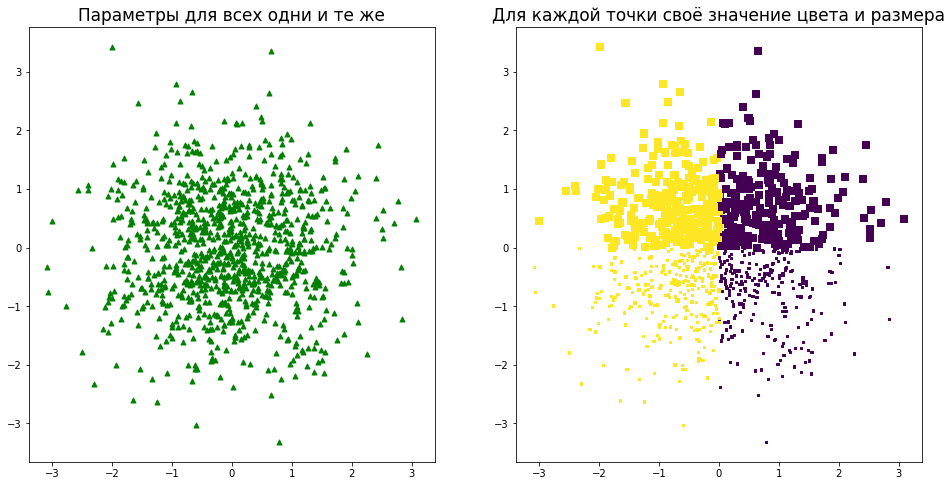

In [26]:
plt.figure(figsize = (16, 8))

plt.subplot(1, 2, 1)
plt.scatter(x, y, 
            s=25, 
            marker='^', 
            color='green')
plt.title('Параметры для всех одни и те же', fontsize=17)

plt.subplot(1, 2, 2)
plt.scatter(x, y, 
         s=[5 if y[i] < 0 else 50 for i in range(1000)], 
         marker='s',
         c=(x < 0))
plt.title('Для каждой точки своё значение цвета и размера', fontsize=17)

plt.show()

## Расположение нескольких графиков рядом

Выше уже несколько раз использовалась функция `plt.subplots()`, пришло время поговорить про неё подробнее. Как было видно выше, она возволяет располагать несколько отдельных графиков на одном изображении. 

### Коротко про Figure и Axis

Чтобы было понятнее, углубимся в то, как устроен вывод в matplotlib. Всё окно является объектом класса `Figure`, именно его размеры мы задаём параметром `figsize` в функции `plt.figure()`, которая этот объект создаёт. Уже в этой области располагаются объекты класса `Axis`, по умолчанию один, но может быть и несколько. Явно добавить его можно методом `add_subplot()`, указав в качестве аргумента три числа: количество строк $a$, на которые нужно разделить область `Figure`, количество столбцов $b$, на которые нужно разделить область `Figure`, и номер фрагмента `Figure` (фрагментов будет $a*b$), на котором мы хотим разместить область `Axis` (отчет происходит с верхного левого края и движемся вправо). Нумерация начинается с 1 и движется слева направо, сверху вниз. 

Ниже приведён пример, как создать `Figure` и `Axis` в явном виде. Чтобы показать различия между ними, мы закрасили их в разные цвета.

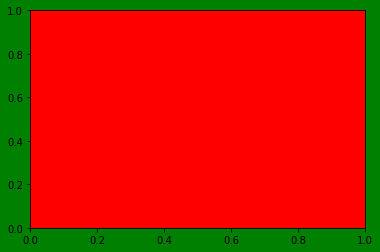

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

fig.set(facecolor = 'green')
ax.set(facecolor = 'red')

plt.show()

Все функции, которые мы выше вызывали как функции из модуля `plt`, могут выступать напрямую методами объекта класса `Axis`. Настройки самой области, такие как заголовок или подписи осей, передаются методами с приставкой `set_`: `set_title`, `set_xlabel` и т.д. Строить графики можно с помощью одноимённых методов: `ax.plot()`, `ax.scatter()` и др.

Построим так один из графиков выше.

In [28]:
x = np.arange(7)
y1 = np.array([3, 1, 2, 4, 5, 3, 4])
y2 = np.array([5, 4, 5, 3, 4, 2, 5])

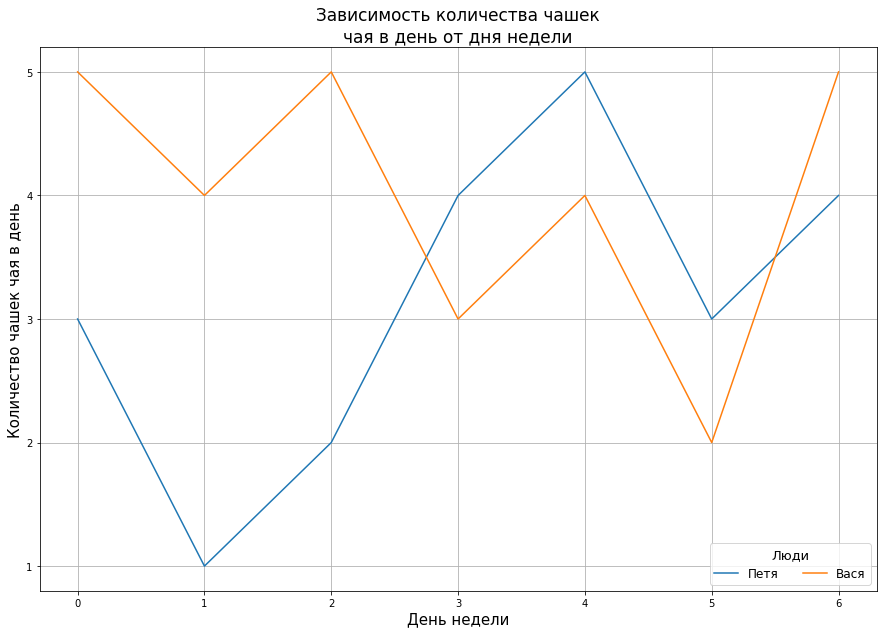

In [29]:
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x, y1, label='Петя')
ax.plot(x, y2, label='Вася')

ax.set_title('Зависимость количества чашек\nчая в день от дня недели', fontsize=17)

ax.set_xlabel('День недели', fontsize=15)
ax.set_ylabel('Количество чашек чая в день', fontsize=15)

ax.set_yticks(np.arange(1, 6))

ax.legend(title='Люди', title_fontsize=13, fontsize=12, ncol=2, loc='lower right')

ax.grid()

Добавлять заголовок можно не только для области `Axis`, но и для всей области `Figure`. Это бывает особенно актуальным для случая, когда рядом располагается несколько графиков. В matplotlib за это отвечает метод `fig.suptitle()`, на вход которому опять же подаётся строка с названием и при необходимости размер шрифта в качестве аргумента `fontsize`.

[]

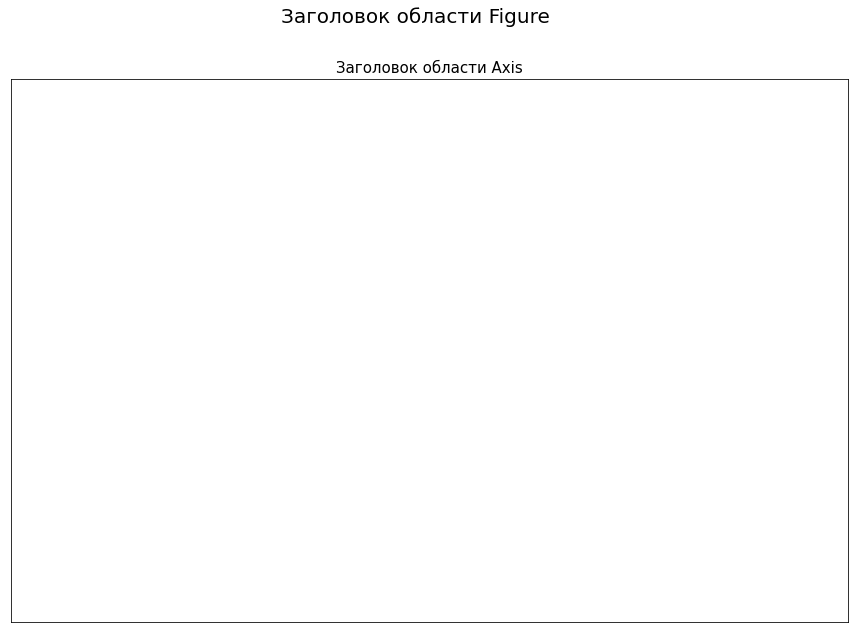

In [30]:
fig = plt.figure(figsize = (15, 10))
fig.suptitle('Заголовок области Figure', fontsize=20)

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Заголовок области Axis', fontsize=15)
ax.set_xticks([])
ax.set_yticks([])

На одной и той же области `Figure` можно разместить несколько областей `Axis`. Для этого каждую из них добавляем функцией `add_subplot()`, увеличив количество строк и столбцов. Кстати, области `Axis` могут пересекаться.

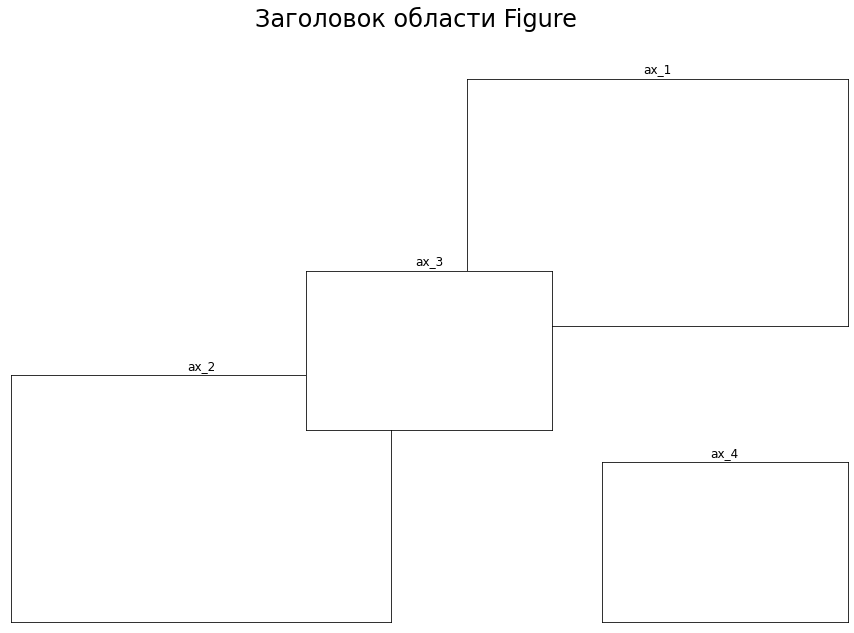

In [31]:
fig = plt.figure(figsize = (15, 10))
fig.suptitle('Заголовок области Figure', fontsize=24)

ax_1 = fig.add_subplot(2, 2, 2)
ax_2 = fig.add_subplot(2, 2, 3)
ax_3 = fig.add_subplot(3, 3, 5)
ax_4 = fig.add_subplot(3, 3, 9)

ax_1.set(title = 'ax_1', xticks=[], yticks=[])
ax_2.set(title = 'ax_2', xticks=[], yticks=[])
ax_3.set(title = 'ax_3', xticks=[], yticks=[])
ax_4.set(title = 'ax_4', xticks=[], yticks=[])

plt.show()

### Функция plt.subplots().

### (На практике обычно это и используется)

Но обычно всё же нужно расположить графики на какой-то регулярной сетке. Чтобы не добавлять для каждого область `Axis` отдельно, можно использовать функцию `plt.subplots()`. На вход она принимает количество строк и столбцов в сетке, также с помощью аргумента `figsize` можно задать размер области `Figure`. А возвращает эта функция объект класса `Figure` и массив объектов класса `Axis`, если их несколько, или же один такой объект. Массив будет двумерным, к каждой конкретной области можно будет обратиться просто по индексу.

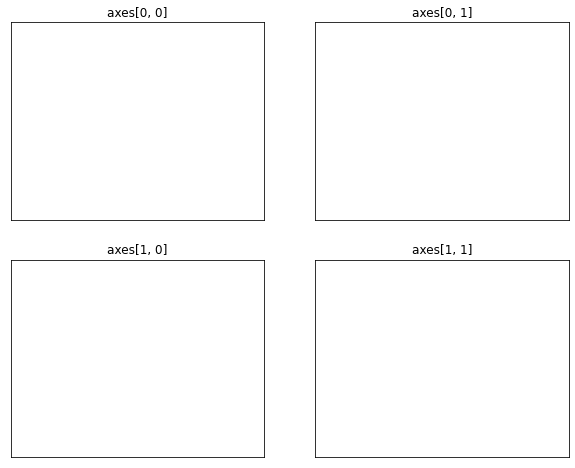

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].set(title='axes[0, 0]', xticks=[], yticks=[])
axes[0, 1].set(title='axes[0, 1]', xticks=[], yticks=[])
axes[1, 0].set(title='axes[1, 0]', xticks=[], yticks=[])
axes[1, 1].set(title='axes[1, 1]', xticks=[], yticks=[])

plt.show()

Если вдруг у нас для всех графиков в столбце или строке ось х или ось у одинаковые, можно не загромождать изображение их повторением и установить параметры `sharex` или `sharey` равными `True`.

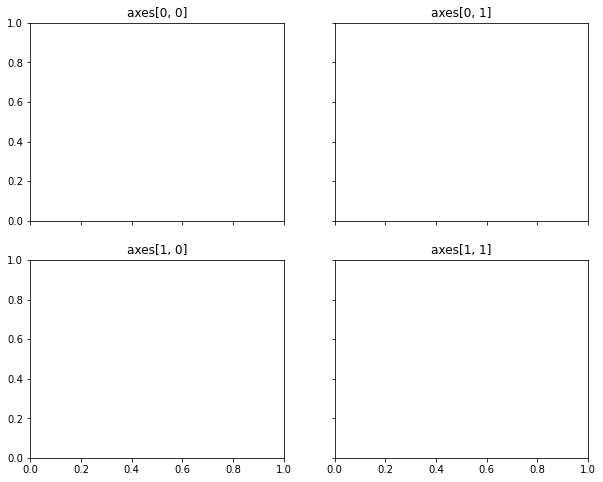

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

axes[0, 0].set(title='axes[0, 0]')
axes[0, 1].set(title='axes[0, 1]')
axes[1, 0].set(title='axes[1, 0]')
axes[1, 1].set(title='axes[1, 1]')

plt.show()

In [34]:
# Скачаем картинку

# import urllib.request

# url = 'https://cs13.pikabu.ru/avatars/3128/x3128007-1508104989.png'
# filename = 'cat.png'
# urllib.request.urlretrieve(url, filename);

Ещё у объекта `ax` можно вообще отключить отображение осей методом `ax.axis()`, которому в качестве аргумента передали строку `'off'`. Это бывает полезно, когда мы хотим отобразить сетку из изображений.

Было:


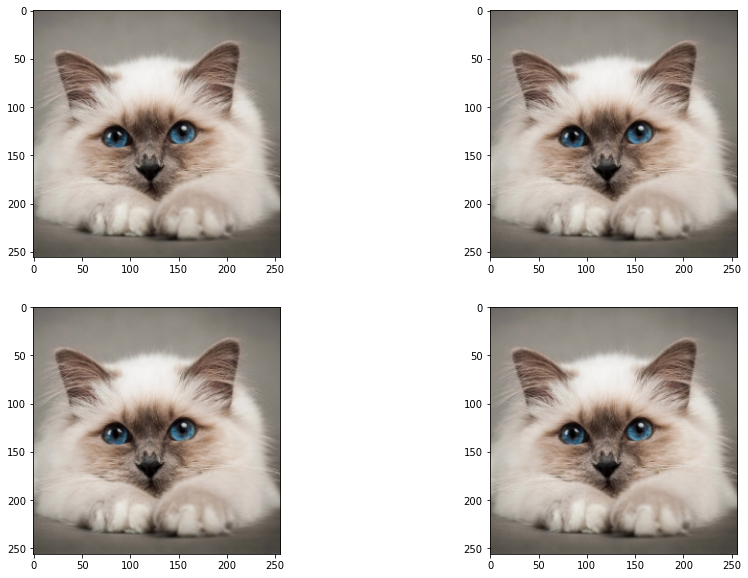

Стало:


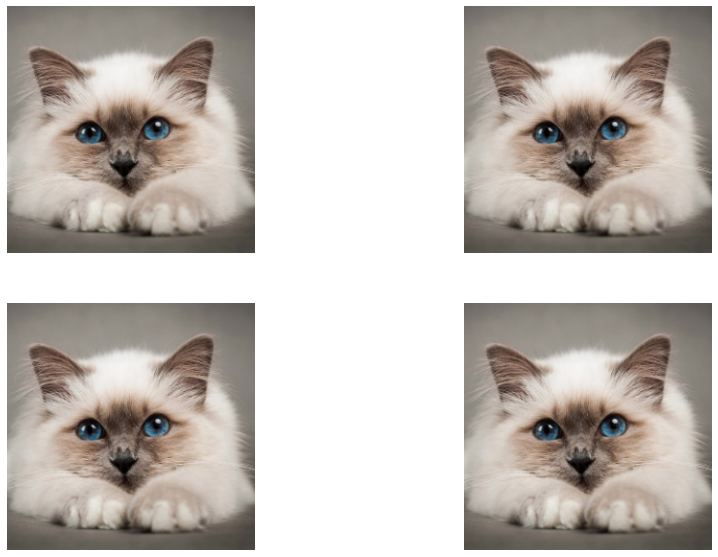

In [35]:
image = plt.imread('cat.png') 

print('Было:')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].imshow(image)
axes[0, 1].imshow(image)
axes[1, 0].imshow(image)
axes[1, 1].imshow(image)

plt.show()


print('Стало:')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].imshow(image)
axes[0, 0].axis('off')
axes[0, 1].imshow(image)
axes[0, 1].axis('off')
axes[1, 0].imshow(image)
axes[1, 0].axis('off')
axes[1, 1].imshow(image)
axes[1, 1].axis('off')

plt.show()

### Функция plt.subplot()

Если же нужно расположить рядом небольшое количество графиков и не хочется использовать довольно громоздкие `fig` и `ax`, можно воспользоваться более простой функцией — `plt.subplot()`. Она тоже на вход принимает количество строк и столбцов, но третьим числом передаётся номер области `Axis`, к которой будут относиться все последующие команды. 

Эта функция тоже поддерживает нерегулярную сетку, но вот наложения областей `Axis` с помощью неё получить не удастся.

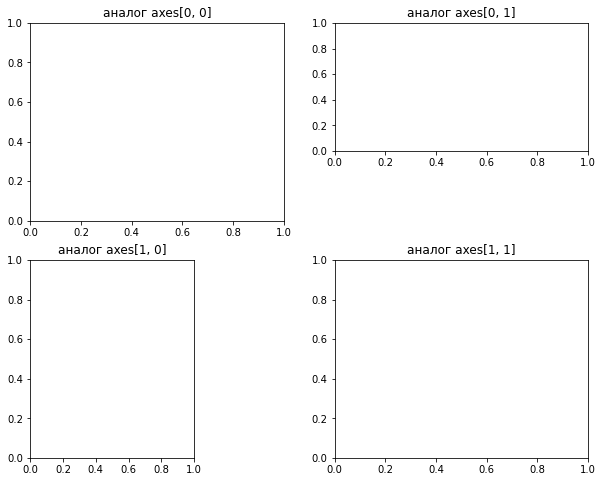

In [36]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title('аналог axes[0, 0]')

plt.subplot(2, 2, 4)
plt.title('аналог axes[1, 1]')

plt.subplot(2, 3, 4)
plt.title('аналог axes[1, 0]')

plt.subplot(3, 2, 2)
plt.title('аналог axes[0, 1]')

plt.show()

## Кратко про более сложные виды графиков

С этого блока начнём знакомиться со второй анонсированной библиотекой для визуализации — seaborn (сокращают как sns). Она написана поверх matplotlib, но предлагает более высокоуровневый интерфейс. Благодаря этому можно быстрее строить самые распространённые графики. Также seaborn располагает большим количеством методов для визуализации статистических данных, некоторые из них мы разберём ниже.

### Некоторые возможности метода relplot

Первый метод из этой библиотеки, который мы разберём, — это `sns.relplot()`, включающий в себя множество очень разных графиков.

Сначала загрузим набор данных через `sns.load_dataset()`, для примера будем использовать датасет `tips`, содержащий следующую информацию:
- `total_bill` — общий счет, т.е. стоимость заказанной еды в долларах США (с учетом налогов);
- `tip` — размер чаевых в долларах США;
- `sex` — пол человека, который оплачивает счет;
- `smoker` — наличие курильщика среди участников одного заказа;
- `day` — день недели;
- `time` — время суток (lunch - первая половина дня, dinner - вторая половина дня);
- `size` — количество людей в группе, выполнившей один заказ.

In [37]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


В самой простой вариации `sns.relplot()` изображает график разброса точек в некоторой плоскости, признаки, соответствующие осям, указываются в аргументах `x` и `y`, параметр `data` указывает из какого набора данных брать значения.

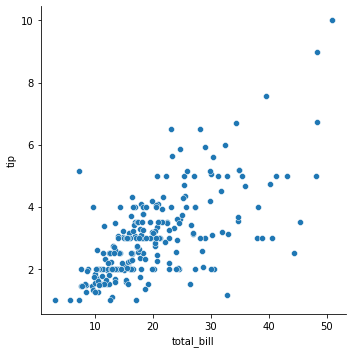

In [38]:
sns.relplot(x='total_bill', 
            y='tip', 
            data=tips);

Цвет по умолчанию один и тот же для всех точек, но с помощью параметра `hue` можно указать признак, по которому для разных категорий будет использоваться разный цвет. Этот признак может быть как категориальным, так и числовым. Легенда по этому параметру создаётся автоматически, но может понадобиться аргумент `legend` указать равным `'full'`, чтобы в неё включались все значения числового признака.

Также с помощью `sns.relplot()` можно построить сразу несколько графиков. Для этого нужно указать в аргументе `col` или `row` признак, по которому нужно разделить данные и построить графики в разных колонках или строках соответственно.

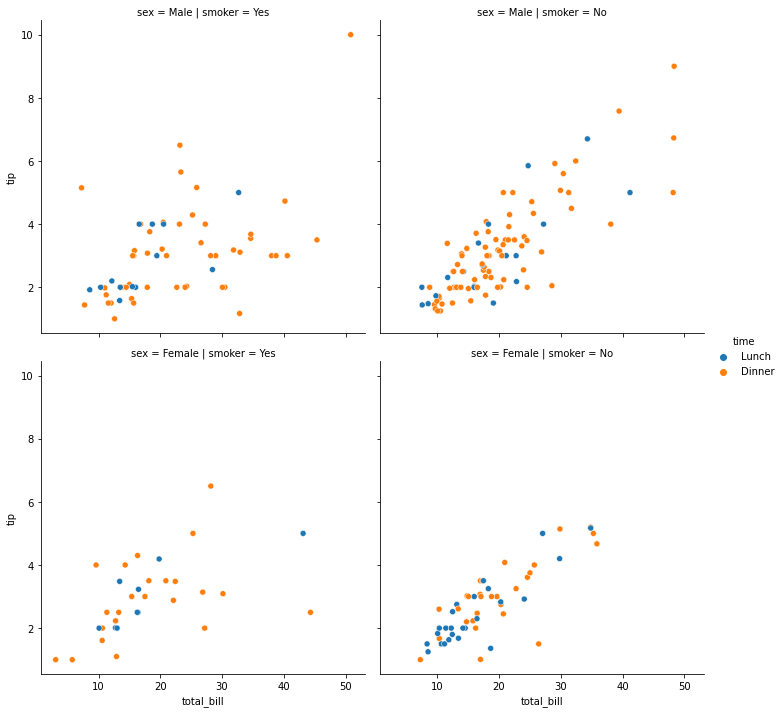

In [39]:
sns.relplot(x='total_bill',
            y='tip',
            hue='time',
            col='smoker',
            row='sex',
            data=tips);

Другой тип графика, который можно построить с помощью `sns.relplot()`, — это линейный график. Чтобы его разобрать подробнее, загрузим набор данных `fmri` с результатами МРТ. 

In [40]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


Сначала посмотрим на данные в формате графика разброса точек. 

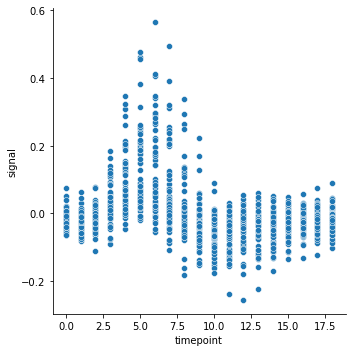

In [41]:
sns.relplot(x='timepoint',
            y='signal',
            data=fmri);

Как мы видим, одним и тем же значениям из столбца `timepoint` соответствуют разные значения столбца `signal`. Можно воспринимать это как последовательность случайных величин и построить их статистическое распределение. Для этого линейный график в функции `sns.relplot()` отсортирует данные по точкам на оси х, найдёт среднее значение для каждой группы измерений и его 95%-й доверительный интервал. Чтобы указать, что мы хотим построить именно линейный график, нужно установить параметр `kind` равным `'line'`.

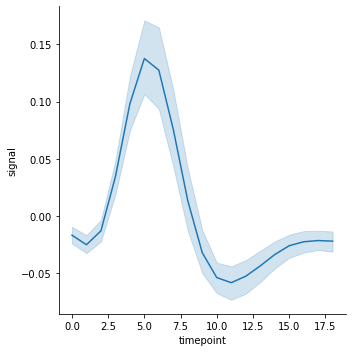

In [42]:
sns.relplot(x='timepoint',
            y='signal',
            kind='line',
            data=fmri);

У такого линейного графика есть аргумент, позволяющий регулировать доверительный интервал. Это параметр `ci` и по умолчанию он равен 95, но можно установить его равным любому другому числу. 

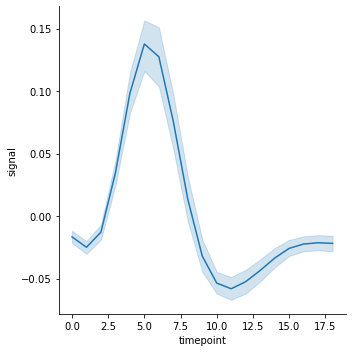

In [43]:
sns.relplot(x='timepoint',
            y='signal',
            ci=80,
            kind='line',
            data=fmri);

Также построение доверительного интервала можно отключить совсем, что соответствует значению `None` для аргумента `ci`.

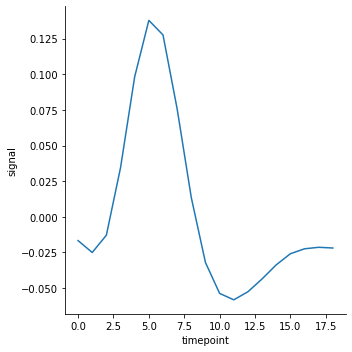

In [44]:
sns.relplot(x='timepoint',
            y='signal',
            ci=None,
            kind='line',
            data=fmri);

Кроме того, вместо доверительного интервала можно указать на графике стандартное отклонение, установив параметр `ci` равным `'sd'`.

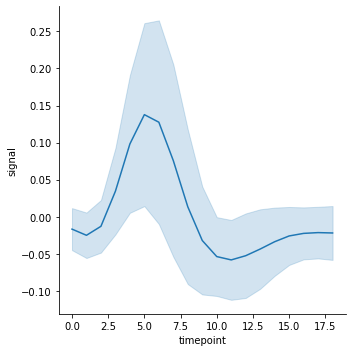

In [45]:
sns.relplot(x='timepoint',
            y='signal',
            ci='sd',
            kind='line',
            data=fmri);

Аргументы `hue`, `row` и `col` здесь работают точно так же, как и для графика разброса точек. 

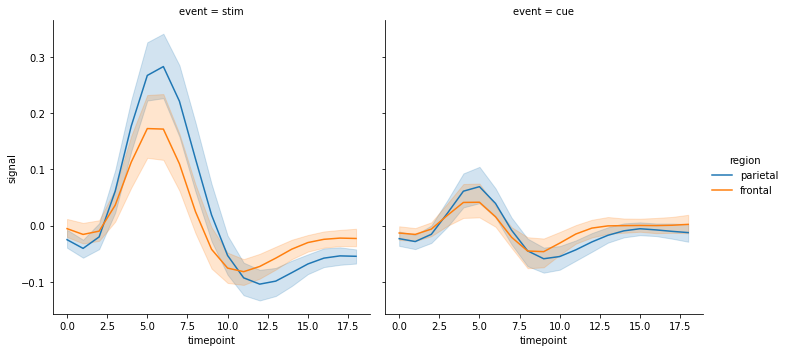

In [46]:
sns.relplot(x='timepoint',
            y='signal',
            kind='line',
            hue='region',
            col='event',
            data=fmri);

Что касается размера графиков, как видно выше, метод его подбирает самостоятельно. Но при желании можно его поменять при помощи аргумента `height`, задающего высоту графика, и параметра `aspect`, указывающего соотношение сторон.

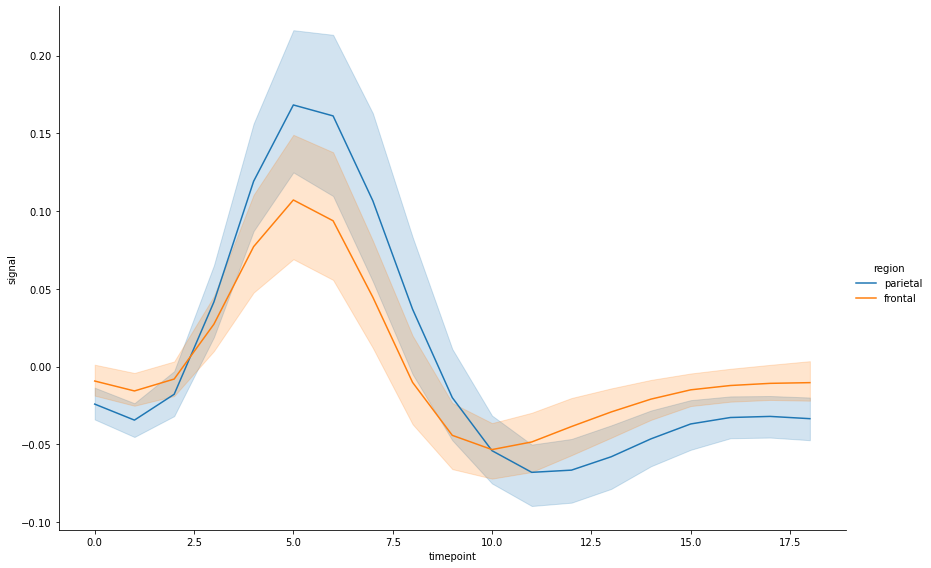

In [47]:
sns.relplot(x='timepoint',
            y='signal',
            kind='line',
            hue='region',
            height=8,
            aspect=1.5,
            data=fmri);

### Heatmap

Heatmap -- это удобный способом визуализировать матрицу. Здесь по осям располагаются строки и столбцы матрицы, а значениям элементов соответствует цвет. Сами значения можно как писать поверх, так и не указывать вообще, если числовая точность не так важна.

Вернёмся к набору данных `tips`, но приведём его в виду двумерной матрицы в координатах дня и размера группы. Так мы смотрим зависимость чаевых только от этих двух параметров.

In [48]:
ds = pd.pivot_table(data=tips, index='day', columns='size', values='tip')
ds

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


Для некоторых пар значение чаевых равняется `NaN` из-за отсутствия данных, но визуализации это не помешает. 

Воспользуемся функцией `sns.heatmap()`, первым аргументом подаётся матрица значений. Основную часть параметров `sns` снова подберёт сам, но здесь можно подать в качестве аргумента `ax` объект типа `Axis`, на котором мы хотим построить нужный график.

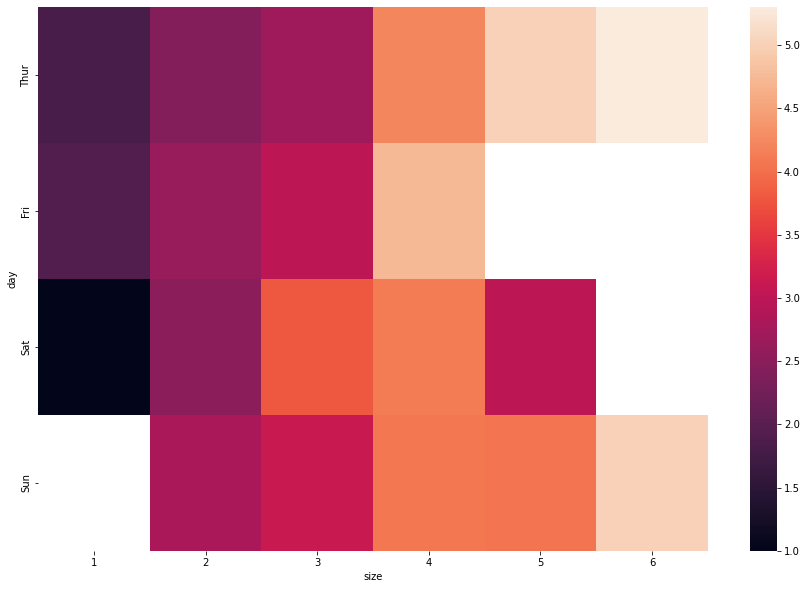

In [49]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(ds, ax=ax);

Как видим, ячейкам со значением `NaN` соответствуют белые клетки. Остальные окрашены в соответствии со значениями, а перевод из цвета в числовой промежуток указан на шкале справа. 

Также с помощью `ax` можно добавлять заголовок или менять подписи осей, как мы уже делали ранее. А значения для делений осей можно передавать напрямую в `sns.heatmap()` через аргументы `xticklabels` и `yticklabels` соответственно. Поворот для них метод подберёт так, чтобы они помещались, самостоятельно.

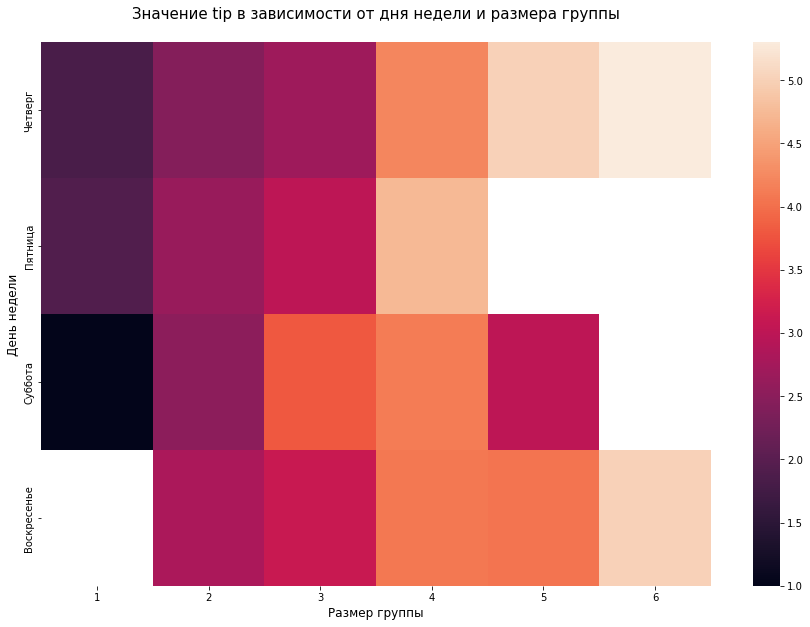

In [50]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(ds, 
                 ax=ax, 
                 yticklabels=['Четверг', 'Пятница', 'Суббота', 'Воскресенье'])

ax.set_title('Значение tip в зависимости от дня недели и размера группы\n', fontsize=15)
ax.set_xlabel('Размер группы', fontsize=12)
ax.set_ylabel('День недели', fontsize=12);

Но, пожалуй, в анализе `sns.heatmap` чаще всего используют для визуализации матрицы корреляций между признаками. Чтобы показать, как это работает, сгенерируем некоторые случайные данные.

In [51]:
t = np.linspace(0, 5, 200) * np.ones((7, 200)) + np.random.randn(7, 200).cumsum(axis=1)
a = np.array([0.5, 1, 2.1, -1.3, -0.1, 1.9, -2.9]).reshape(-1, 1)
b = np.array([-3, -4, -10, 4, 1, -5, 6]).reshape(-1, 1)

df = pd.DataFrame((a*t + b).T, columns=list('ABCDEFG'))

Посмотрим на них в формате линейного графика и попробуем предположить, какие из признаков сильно коррелируют друг с другом. 

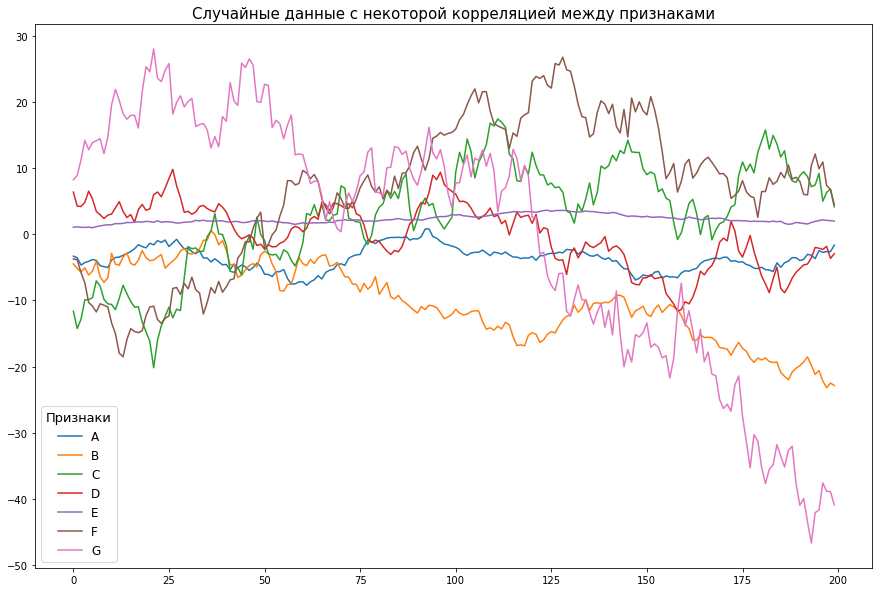

In [52]:
plt.figure(figsize=(15, 10))
plt.plot(df.values)
plt.legend(labels=df.columns, title='Признаки', title_fontsize=13, fontsize=12)
plt.title('Случайные данные с некоторой корреляцией между признаками', fontsize=15)

plt.show()

Можно предположить, например, что признаки `F` и `C` довольно сильно коррелируют, но точно определить это на глаз довольно сложно, как и заметить менее наглядные корреляции. Поэтому построим тепловую карту для корреляционной матрицы.

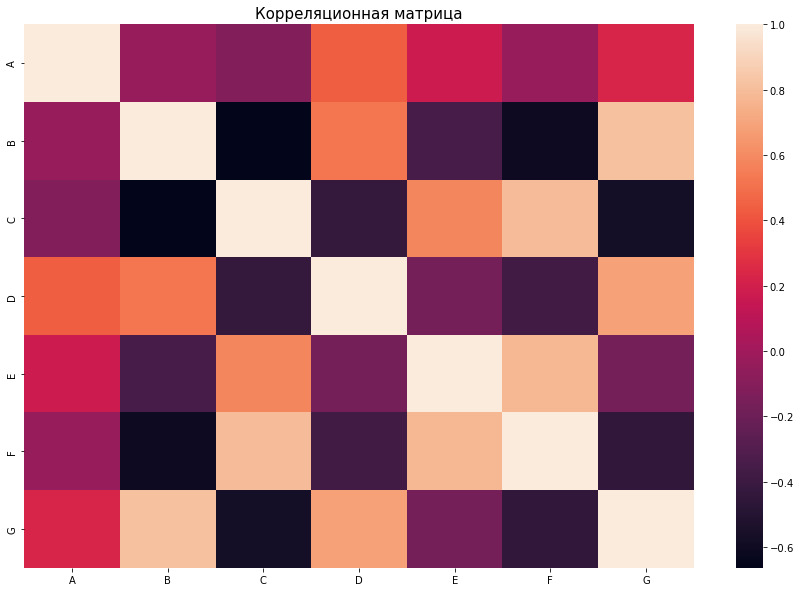

In [53]:
corr_matrix = df.corr() # Посчитаем корреляцию Пирсона для всех признаков

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(data=corr_matrix, ax=ax)
ax.set_title('Корреляционная матрица', fontsize=15);

Теперь по цвету можно сказать, что признак `B` довольно сильно коррелирует с `C` и `F`, но опять  же на глаз определить с каким из них сильнее довольно сложно. Именно поэтому `sns.heatmap()` может указывать значения из матрицы. Для этого нужно указать аргумент `annot` равным `True`.

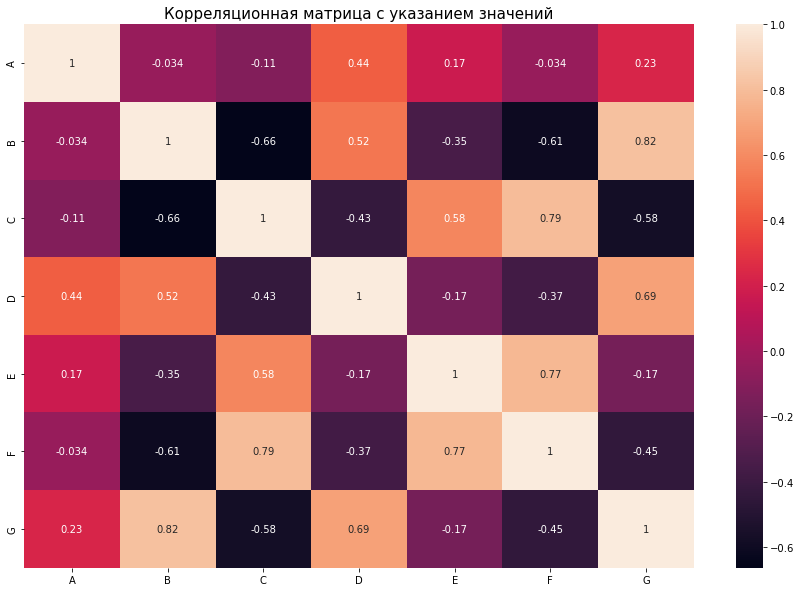

In [54]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(data=df.corr(), ax=ax, annot=True)
ax.set_title('Корреляционная матрица с указанием значений', fontsize=15);

Теперь мы уже точно можем выделить наиболее или наименее скоррелированные признаки и на основе этого продолжить предварительный анализ имеющихся данных.

### Гистограммы: histplot и displot

Для построения гистограмм есть функция `plt.hist()` и более высокоуровневый вариант `sns.histplot`. Разберём сразу второй, поскольку он содержит большинство аргументов первого, но обладает большей гибкостью.

Загрузим из библиотеки seaborn набор данных `penquins` для наглядности примеров. 

In [55]:
penguins = sns.load_dataset('penguins')

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


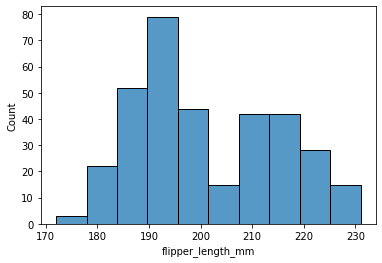

In [56]:
sns.histplot(penguins.flipper_length_mm);

Чтобы гистограмма была более подробной, нужно увеличить значение аргумента `bins`, по умолчанию метод его подбирает сам.

Также в `sns.histplot()` тоже можно подавать объект класса `Axis`. Кроме того, при желании можно менять цвет столбцов (параметр `color`) и их границ (параметр `endgecolor`).

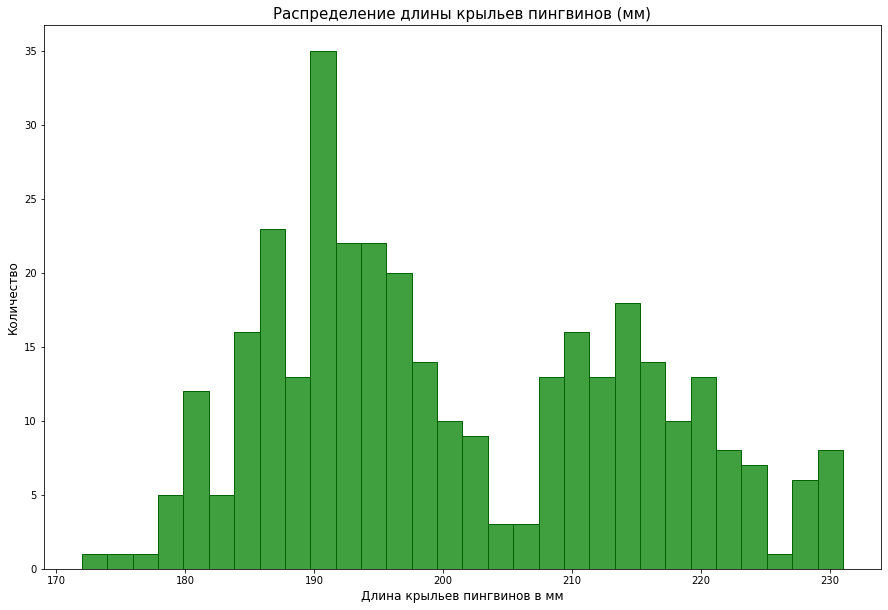

In [57]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Распределение длины крыльев пингвинов (мм)', fontsize=15)
ax.set_xlabel('Длина крыльев пингвинов в мм', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)

sns.histplot(penguins.flipper_length_mm,
             bins=30,
             ax=ax, 
             color='green',
             edgecolor='darkgreen');

Если хочется, можно построить горизонтальную гистограмму. Для этого методу нужно уточнить, что мы подаём массив `y`, а не `x`, как он считает по умолчанию.

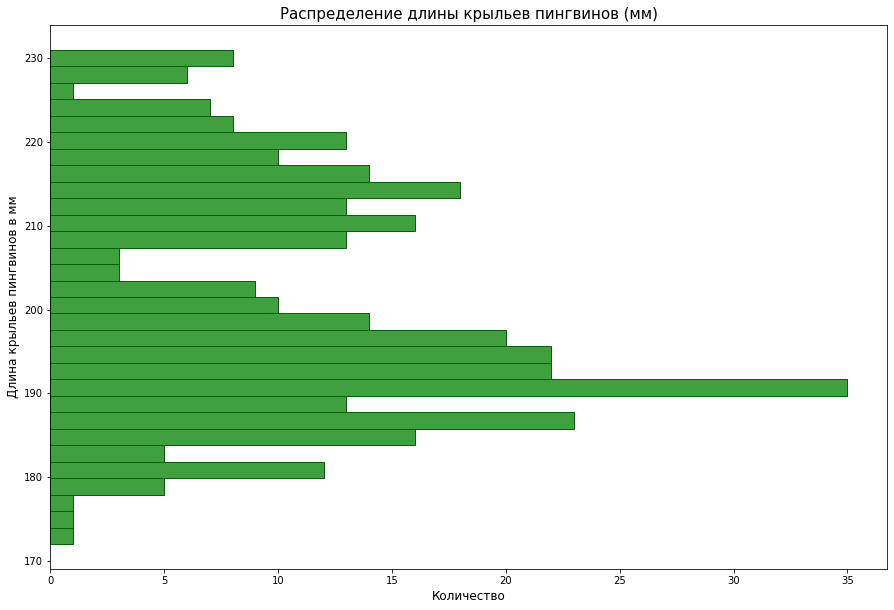

In [58]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Распределение длины крыльев пингвинов (мм)', fontsize=15)
ax.set_ylabel('Длина крыльев пингвинов в мм', fontsize=12)
ax.set_xlabel('Количество', fontsize=12)

sns.histplot(y=penguins.flipper_length_mm,
             bins=30,
             ax=ax, 
             color='green',
             edgecolor='darkgreen');

У этого метода, так же как и у `sns.relplot()`, есть возможность посторить разные гистограммы для разных значений другого признака на одном и том же графике. Для этого вместо одного массива `penguins.flipper_length_mm` нужно подать весь набор данных в поле `data`, указать в параметре `x` распределение какого столбца мы хотим построить, а в параметре `hue` — по какому признаку хотим разделить данные на разные гистограммы.

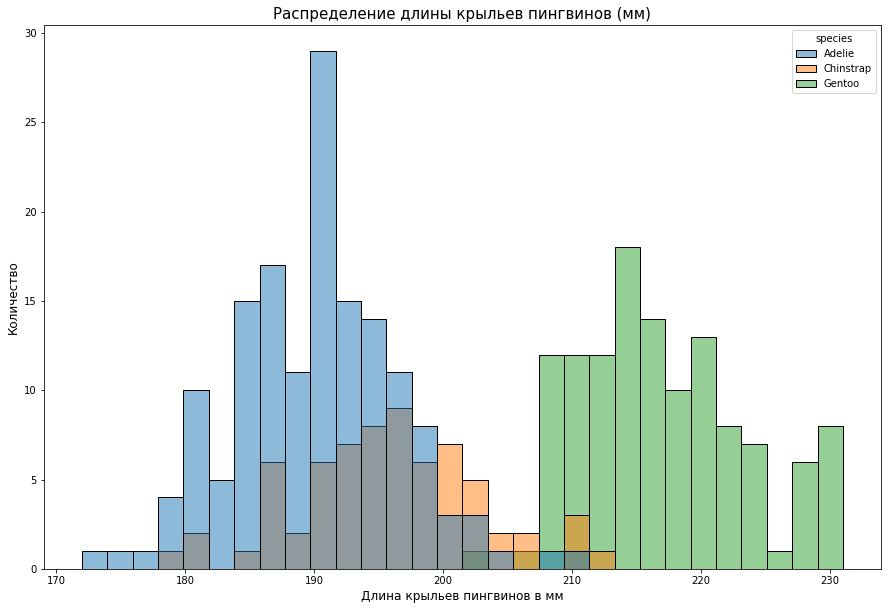

In [59]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Распределение длины крыльев пингвинов (мм)', fontsize=15)
ax.set_xlabel('Длина крыльев пингвинов в мм', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)

sns.histplot(data=penguins,
             x='flipper_length_mm',
             bins=30,
             ax=ax,
             hue='species');

Кроме самой гистограммы, можно построить также график функции плотности для каждого из распределений. Для этого нужно установить значение `True` в параметре `kde`.

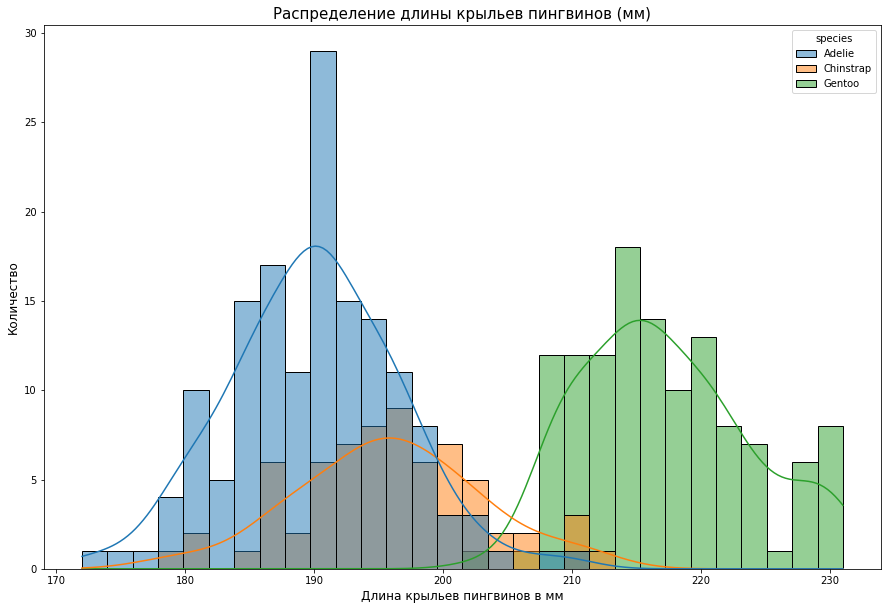

In [60]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Распределение длины крыльев пингвинов (мм)', fontsize=15)
ax.set_xlabel('Длина крыльев пингвинов в мм', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)

sns.histplot(data=penguins,
             x='flipper_length_mm',
             bins=30,
             ax=ax,
             kde=True,
             hue='species');

Во многом аналогом `sns.histplot()` является `sns.displot()`, например, график выше можно было бы построить так:

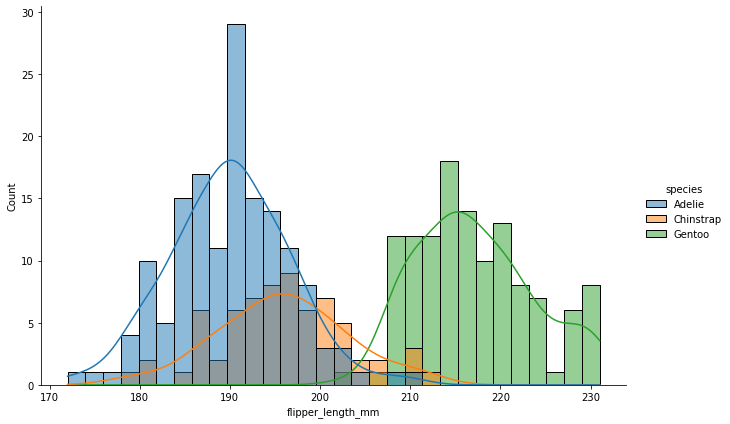

In [61]:
sns.displot(data=penguins,
            x='flipper_length_mm',
            hue='species',
            kde=True,
            bins=30,
            height=6,
            aspect=1.5);

Как видно, `sns.displot()` уже не имеет аргумента `ax`, но размер можно регулировать по-другому, как и в случае с `sns.relplot()`. В чём же плюс этого метода? 

Например, он может построить только функцию плотности. Укажем для этого значение параметра `kind` как `'kde'`.

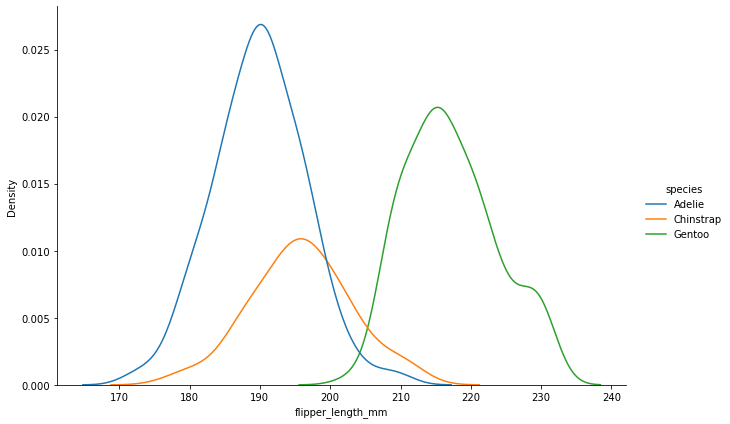

In [62]:
sns.displot(data=penguins,
            x='flipper_length_mm',
            hue='species',
            kind='kde',
            height=6,
            aspect=1.5);

Более того, можно построить и эмпирически найденную функцию распределения, в этом случае аргумент `kind` должен быть равен строке `'ecdf'`.

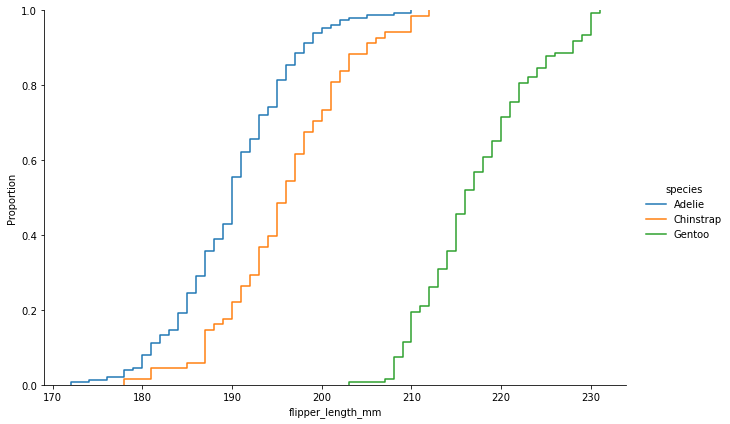

In [63]:
sns.displot(data=penguins,
            x='flipper_length_mm',
            hue='species',
            kind='ecdf',
            height=6,
            aspect=1.5);

Если мы хотим разнести графики функций распределения для самцов и самок на разные графики, можно это сделать с помощью параметра `col` для столбцов (аналогично `row` для разных строк), как и в случае метода `sns.relplot()`.

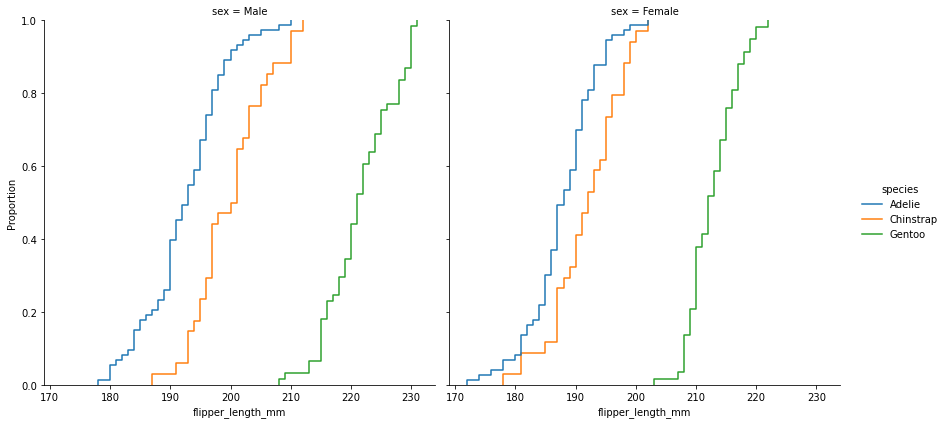

In [64]:
sns.displot(data=penguins,
            x='flipper_length_mm',
            hue='species',
            col='sex', # Здесь разбиваем по признаку sex на два подграфика
            kind='ecdf',
            height=6,
            aspect=1);

### Попарные графики и метод pairplot

Последним из методов библиотеки seaborn, который мы тут рассмотрим, будет `sns.pairplot()`. Он попарно строит графики разброса точек для всех числовых признаков, а на диагонали для каждого из них строит гистограмму его распределения.

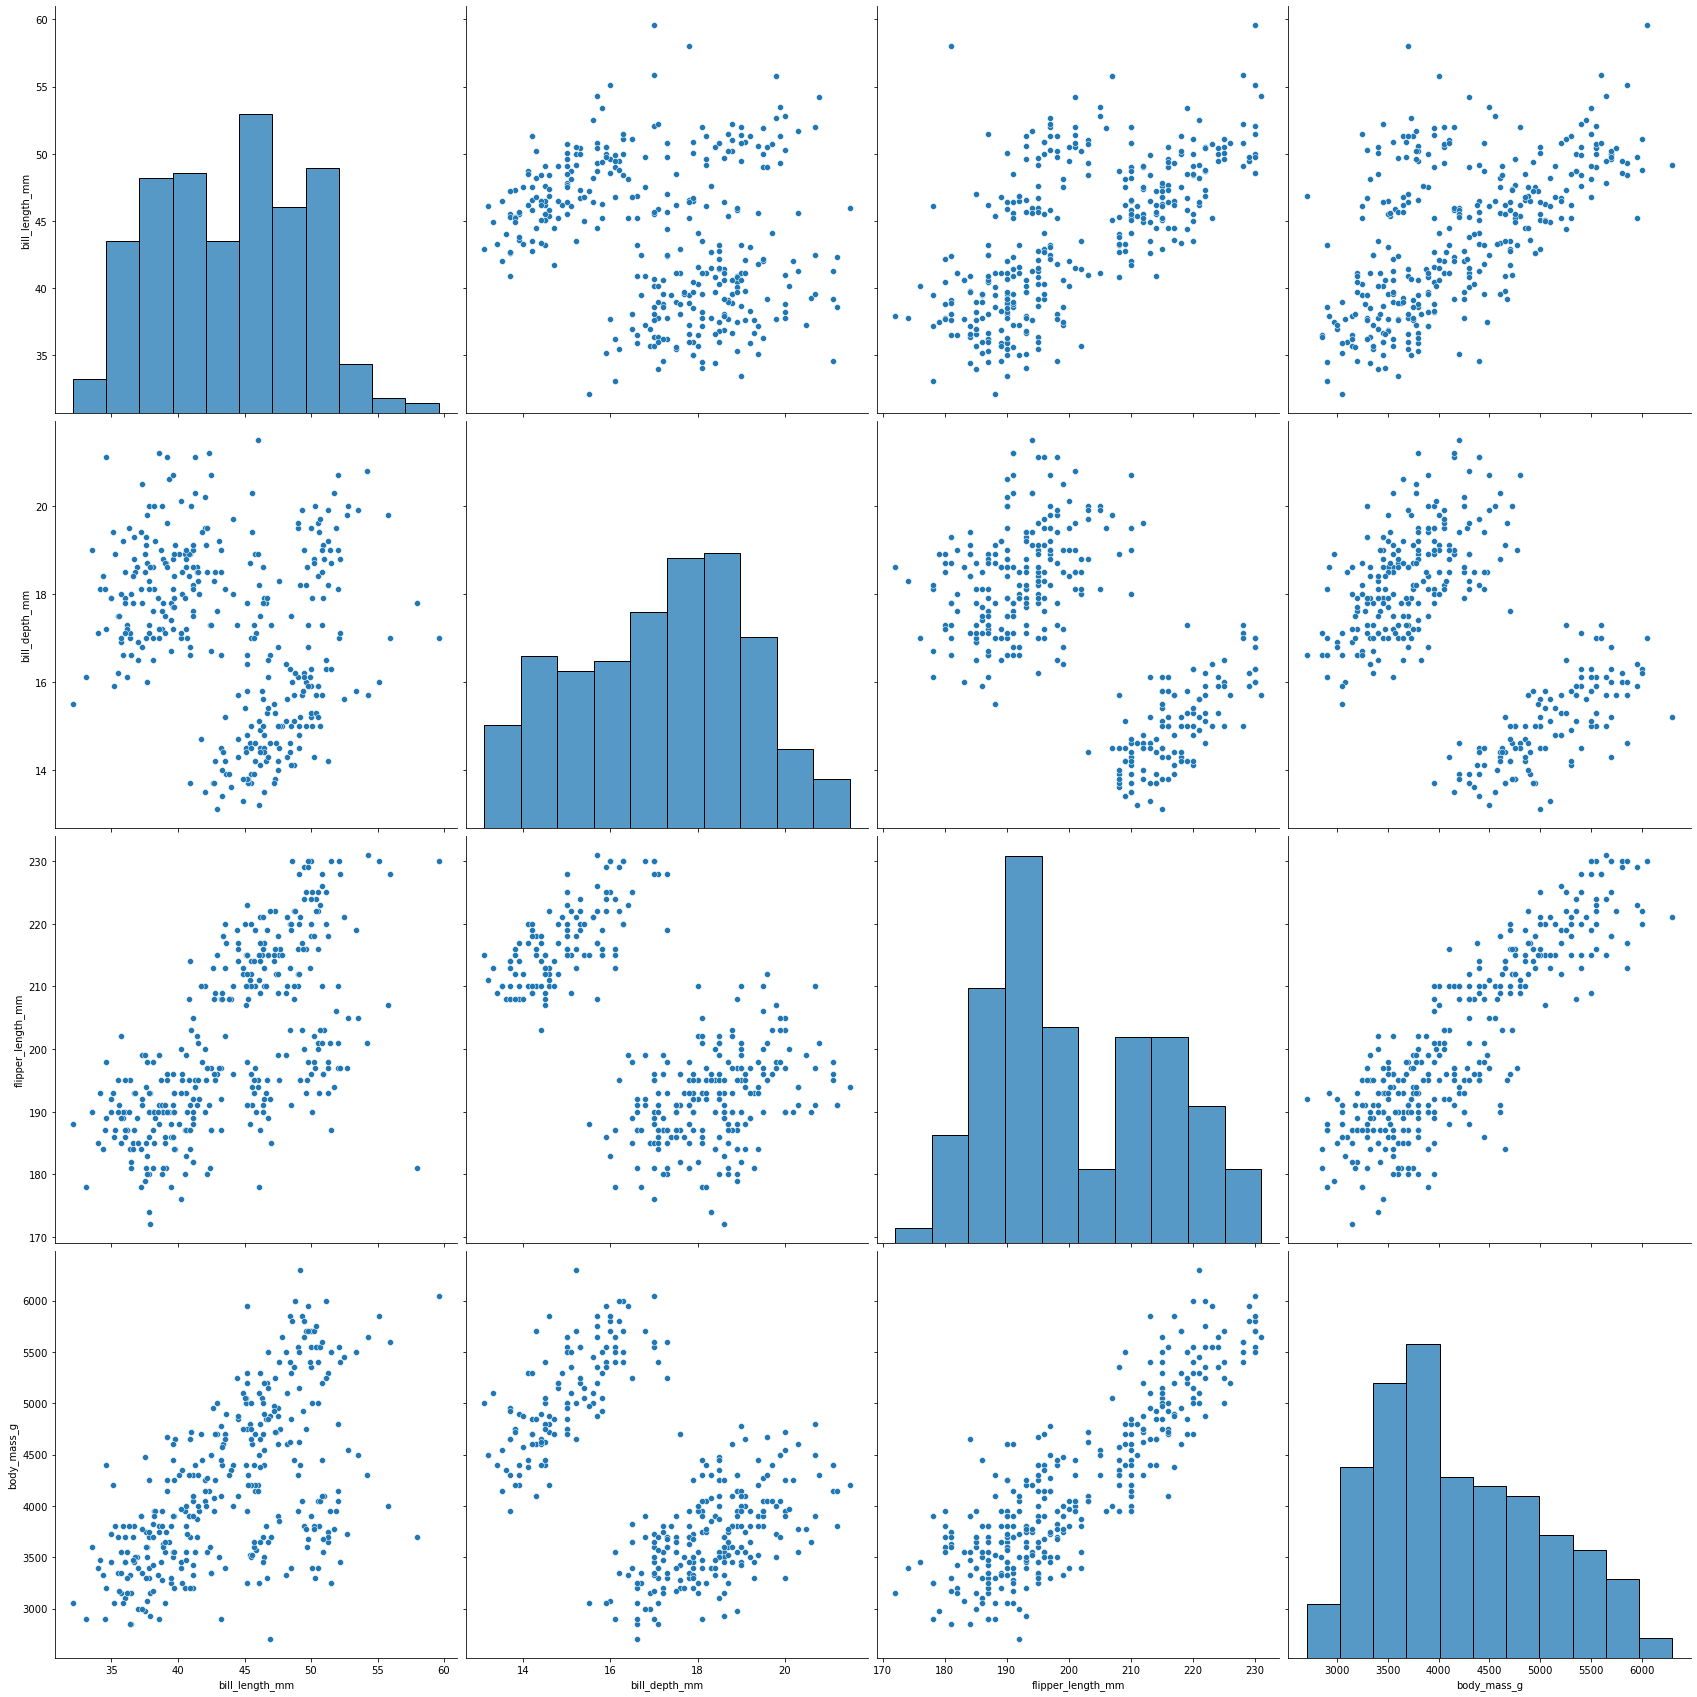

In [65]:
sns.pairplot(penguins, height=6, aspect=1);

Здесь тоже можно разделить данные по категориальному признаку, например, по видам, как мы делали выше. В этом случае на диагонали по умолчанию будет не гистограмма, а функция плотности с заливкой.

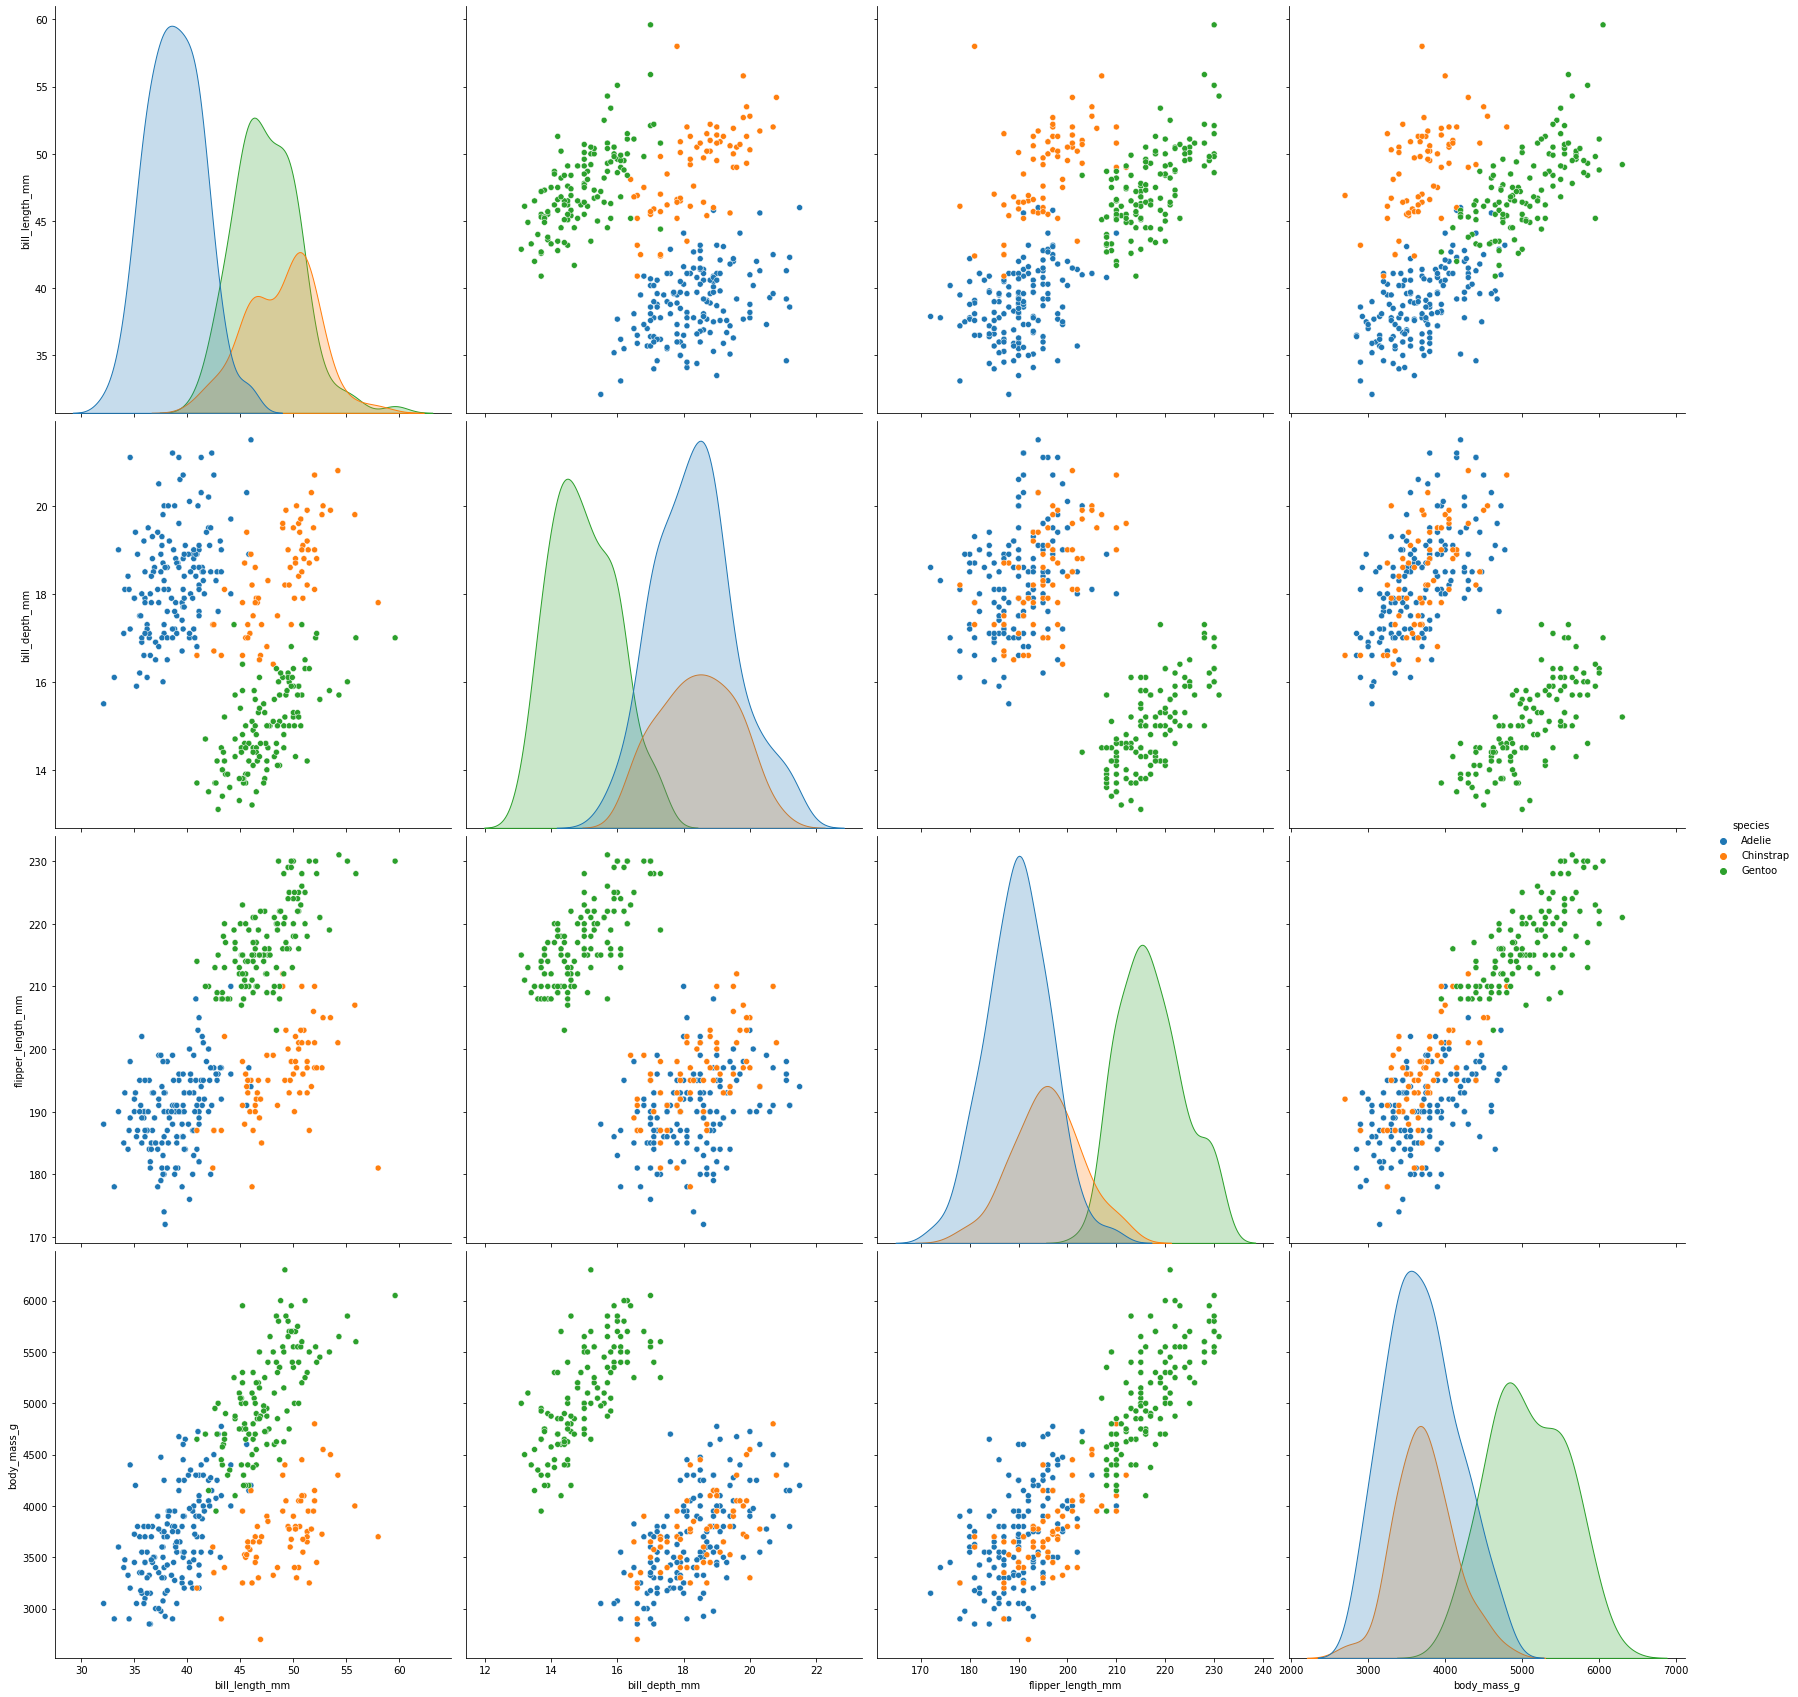

In [66]:
sns.pairplot(penguins, 
             hue='species',
             height=6,
             aspect=1);

## Еще немного полезных советов

Кроме вышеописанных методов для построения графиков у библиотеки seaborn есть замечательный метод set(), который позволяет по умолчанию выставить сетку и цветовую гамму. Эта функция являвляется стандартом и мы советуем всегда добавлять ее в свои ноутбуки.

Также есть волшебная строчка `%config InlineBackend.figure_format = 'retina'`, которая позволит сделать графики более четкими.

Несмотря на то, что каждый график индивидуален (один лучше выглядит с большим размером полотна и шрифта, другой с меньшими), бывает удобно сразу изменить значения по умолчанию у matplotlib. Сделать это можно с помощью методов семейства plt.rcParams

Теперь можете вставить код ниже сразу после импортов и посмотреть как изменятся построенные нами графики.

In [67]:
%config InlineBackend.figure_format = 'retina'

# sns.set(style='whitegrid', palette='deep')
sns.set(style='darkgrid', palette='rocket')
sns.set(style='darkgrid', palette='deep')

plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'